In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [207]:
!gdown 1Za2DIwYB7bBHdMevZX8NMLssm6dcMC6f

Downloading...
From: https://drive.google.com/uc?id=1Za2DIwYB7bBHdMevZX8NMLssm6dcMC6f
To: /content/LoanTap_logistic_regression.csv
100% 100M/100M [00:01<00:00, 78.8MB/s] 


##Problem Statement

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

In [208]:
df = pd.read_csv('LoanTap_logistic_regression.csv')

In [209]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.00,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.00,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.00,0.00,36369.00,41.80,25.00,w,INDIVIDUAL,0.00,0.00,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.00,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.00,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.00,0.00,20131.00,53.30,27.00,f,INDIVIDUAL,3.00,0.00,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.00,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.00,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.00,0.00,11987.00,92.20,26.00,f,INDIVIDUAL,0.00,0.00,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.00,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.00,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.00,0.00,5472.00,21.50,13.00,f,INDIVIDUAL,0.00,0.00,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.00,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.00,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.00,0.00,24584.00,69.80,43.00,f,INDIVIDUAL,1.00,0.00,"679 Luna Roads\r\nGreggshire, VA 11650"


In [210]:
pd.set_option('display.max_columns', None)
display(df.head())

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.00,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.00,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.00,0.00,36369.00,41.80,25.00,w,INDIVIDUAL,0.00,0.00,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.00,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.00,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.00,0.00,20131.00,53.30,27.00,f,INDIVIDUAL,3.00,0.00,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.00,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.00,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.00,0.00,11987.00,92.20,26.00,f,INDIVIDUAL,0.00,0.00,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.00,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.00,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.00,0.00,5472.00,21.50,13.00,f,INDIVIDUAL,0.00,0.00,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.00,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.00,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.00,0.00,24584.00,69.80,43.00,f,INDIVIDUAL,1.00,0.00,"679 Luna Roads\r\nGreggshire, VA 11650"


from the dataframe we can see there are few columns values that can be reframed.

emp_length --> <1 and 10+  can be changed to 1 and 10 respectively. change dtype to int.

earliest_cr_line --> jun-1990 can be transformed to just 1990. remove the month and we get number of years.



In [211]:
df.shape

(396030, 27)

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [213]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0


There are missing values in the data set. We will review this later in the analysis.

In [214]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

converting employee length values

 10+years --> 10

 <1 year --> 1

 1 year --> 1

 and converting dtype to int

In [215]:
#converting employee length values

df['emp_length'] = df['emp_length'].replace('10+ years', '10', regex=False)
df['emp_length'] = df['emp_length'].replace('< 1 year', '1', regex=False) # Use 1 for <1 year as it represents less than a full year
df['emp_length'] = df['emp_length'].replace(' years', '', regex=True)
df['emp_length'] = df['emp_length'].replace(' year', '', regex=True)
df['emp_length'] = pd.to_numeric(df['emp_length'], errors='coerce').fillna(1).astype(int)
display(df['emp_length'].unique())

array([10,  4,  1,  6,  9,  2,  3,  8,  7,  5])

In [216]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line']).dt.year
display(df['earliest_cr_line'].head())

/tmp/ipython-input-3656125646.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line']).dt.year


,earliest_cr_line
0,1990
1,2004
2,2007
3,2006
4,1999


earlies credit line column values are being changed by removing the month in the value.



##Univariate Analysis

In [217]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

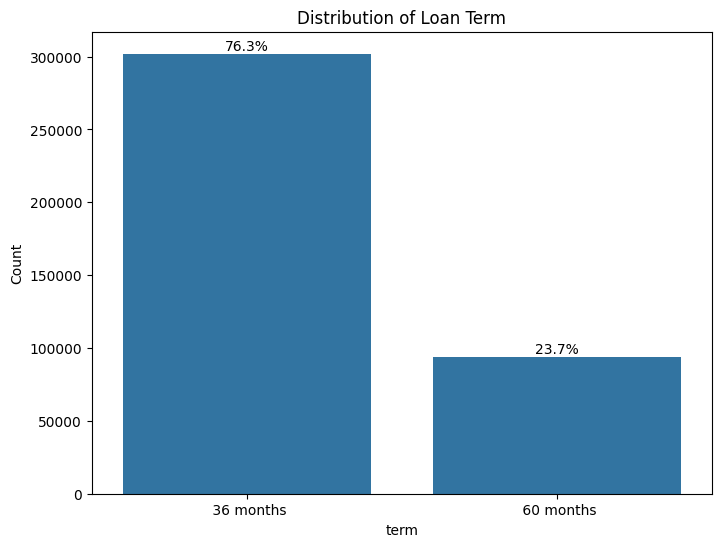

In [218]:
#Distribution of term(No of years the loan has been taken for)

term_counts = df['term'].value_counts()
total_count = term_counts.sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=term_counts.index, y=term_counts.values)

# Add percentage labels to the bars
for i, count in enumerate(term_counts.values):
    percentage = f'{count / total_count:.1%}'
    plt.text(i, count, percentage, ha='center', va='bottom')

plt.xlabel('term')
plt.ylabel('Count')
plt.title('Distribution of Loan Term')
plt.show()

The chart above illustrates the distribution of loan term of the customers. There are two loan terms - 36months comprising of 77% of the dataset and 60 months comprising of 23% of the data set.

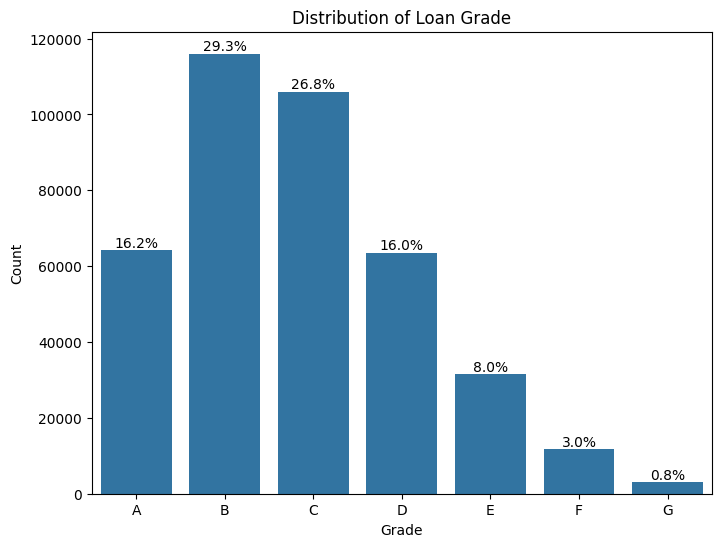

In [219]:
#Distribution of Loan Grade

grade_counts = df['grade'].value_counts()
total_count = grade_counts.sum()
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

#plot the graph
plt.figure(figsize=(8, 6))
sns.barplot(x=grade_counts.index, y=grade_counts.values, order=grade_order)

#Add percentage labels
for i, grade in enumerate(grade_order):
    count = grade_counts[grade]
    percentage = f'{count / total_count:.1%}'
    plt.text(i, count, percentage, ha='center', va='bottom')


plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Distribution of Loan Grade')
plt.show()

The graph above represents the Distribution of Loan Grades assigned by the company. The graph indicates most loans are Grade B with 29% followed by Grade C at 27%. Grade A and D are comprises of almost 16 % each.  Grade G has the lowest count with 0.8%.

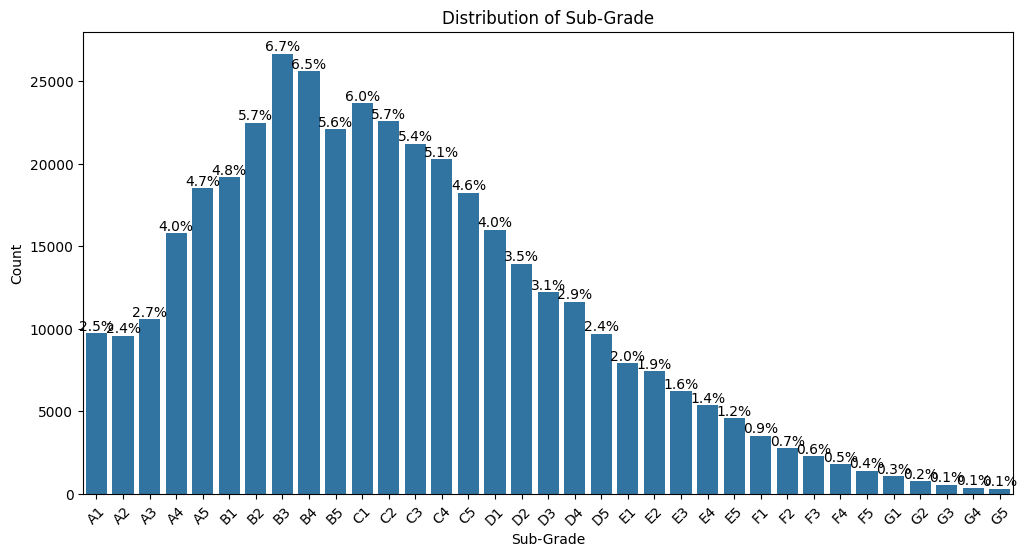

In [220]:
# DIstribution of Sub-Grade

subgrade_counts = df['sub_grade'].value_counts()
total_count = subgrade_counts.sum()
subgrade_order = ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5','C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']

#Plot the graph
plt.figure(figsize=(12, 6))
sns.barplot(x=subgrade_counts.index, y=subgrade_counts.values,order = subgrade_order)

#Add percentage label
for i, subgrade in enumerate(subgrade_order):
    count = subgrade_counts[subgrade]
    percentage = f'{count / total_count:.1%}'
    plt.text(i, count, percentage, ha='center', va='bottom')


plt.xlabel('Sub-Grade')
plt.ylabel('Count')
plt.title('Distribution of Sub-Grade')
plt.xticks(rotation=45)
plt.show()

The graph above illustrates the Distribution of loan Sub_Grades.This graph indicates a similar trend to that of loan grades distribution. We can see Grade B subgrades to have highest counts and Grade G subgrades to have the lowest.

In [221]:
df['emp_length'].nunique()

10

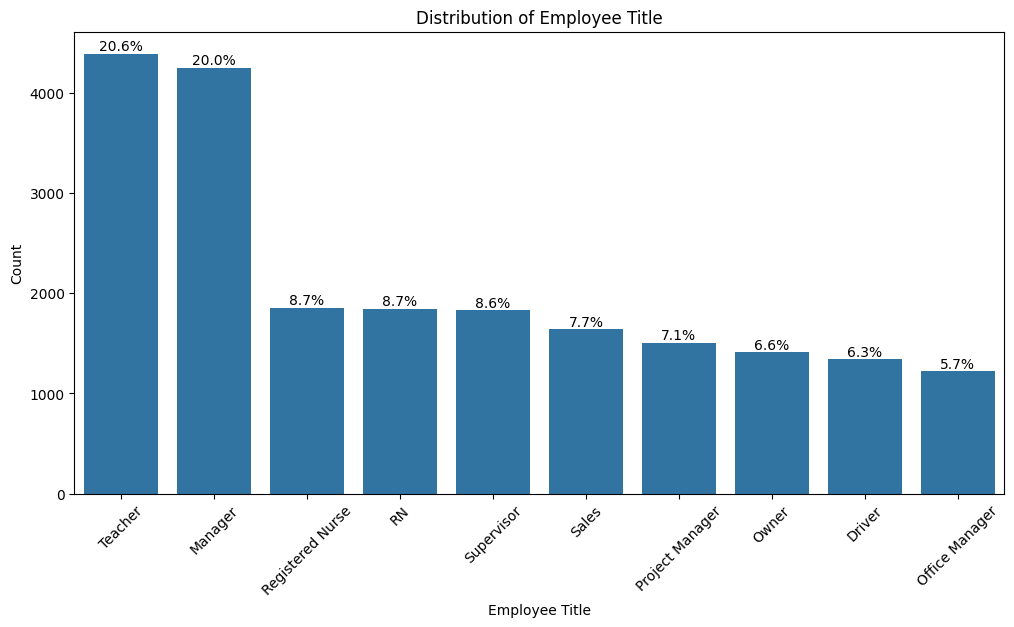

In [222]:
#Distribution of Employee Title

emp_title_counts = df['emp_title'].value_counts()
total_count_top10 = emp_title_counts.head(10).sum()

#Plot the graph
plt.figure(figsize=(12, 6))
sns.barplot(x=emp_title_counts.index[:10], y=emp_title_counts.values[:10])

#Add percentage label
for i, (emp_title, count) in enumerate(emp_title_counts.head(10).items()):
    percentage = f'{count / total_count_top10:.1%}'
    plt.text(i, count, percentage, ha='center', va='bottom')


plt.xlabel('Employee Title')
plt.ylabel('Count')
plt.title('Distribution of Employee Title')
plt.xticks(rotation=45)
plt.show()

The graph above represents distribution of Employee titles ,i.e the customers designation at their work. Most customers are Teachers and Managers at about 20% of the total count. The rest of the customers are Registered nurses, supervisors, in sales and others alike with count rangin from 9% to 6%.  

In [223]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY'], dtype=object)

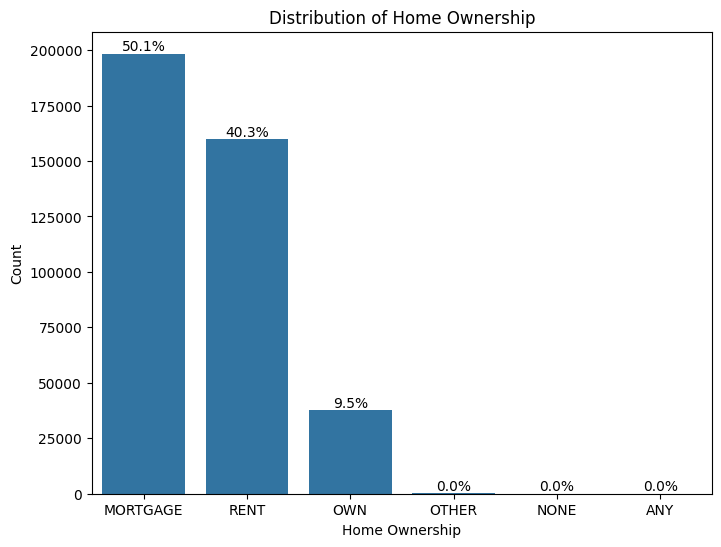

In [224]:
#Distribution of home owndership

home_ownership_counts = df['home_ownership'].value_counts()
total_home_count = home_ownership_counts.sum()

#plot the graph
plt.figure(figsize=(8, 6))
sns.barplot(x=home_ownership_counts.index, y=home_ownership_counts.values)


#Add percentage labels
for i, (home_ownership, count) in enumerate(home_ownership_counts.items()):
    percentage = f'{count / total_home_count:.1%}'
    plt.text(i, count, percentage, ha='center', va='bottom')


plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership')
plt.show()

The graph above illustrates the Distribution of Home ownership. It indicates most customers are owning and currently paying a mortgage( 50% of the total countof customers). Customer renting houses is at 40% of total count. Customers that own their home entirely is about 10%.

In [225]:
df['loan_status'].nunique()

2

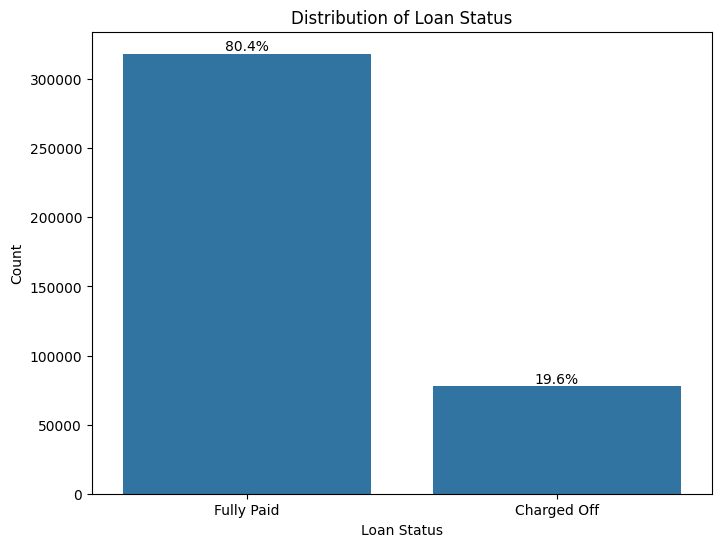

In [226]:
#Distribution of Loan Status

loan_status_counts = df['loan_status'].value_counts()
total_loan_count = loan_status_counts.sum()

#plot the graph
plt.figure(figsize=(8, 6))
sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values)

#Add percentage label
for i, (loan_status, count) in enumerate(loan_status_counts.items()):
    percentage = f'{count / total_loan_count:.1%}'
    plt.text(i, count, percentage, ha='center', va='bottom')


plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status')
plt.show()


The graph above represents the distribution of loan status. Customers that have fully paid their loan stands at 80% while those charged off is at 20%.

In [227]:
df['purpose'].nunique()

14

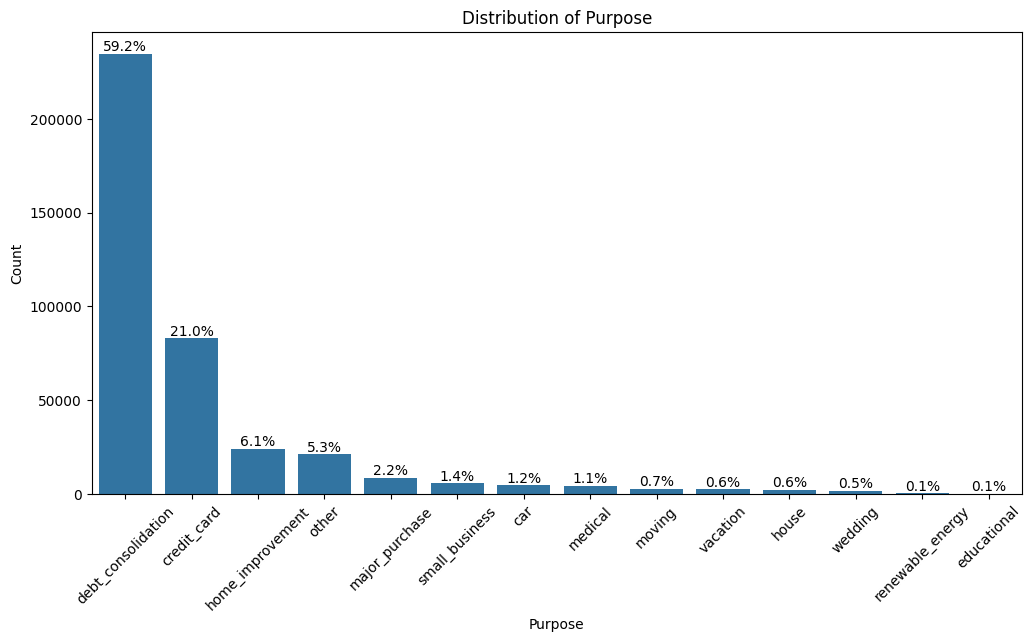

In [228]:
#Distribution of Purpose of loan

purpose_counts = df['purpose'].value_counts()
total_purpose_count = purpose_counts.sum()

#PLot graph
plt.figure(figsize=(12, 6))
sns.barplot(x=purpose_counts.index, y=purpose_counts.values)

#add percentage label
for i, (purpose, count) in enumerate(purpose_counts.items()):
    percentage = f'{count / total_purpose_count:.1%}'
    plt.text(i, count, percentage, ha='center', va='bottom')


plt.xlabel('Purpose')
plt.ylabel('Count')
plt.title('Distribution of Purpose')
plt.xticks(rotation=45)
plt.show()

The graph above illustrates the distribution of purpose of loan. Most customers have taken loans for debt consolidation (60%) followed by paying credit card loan at 21%. The other categories ranges from home improvements , small business , medical and others with counts rangin from 6% - 0.1%.

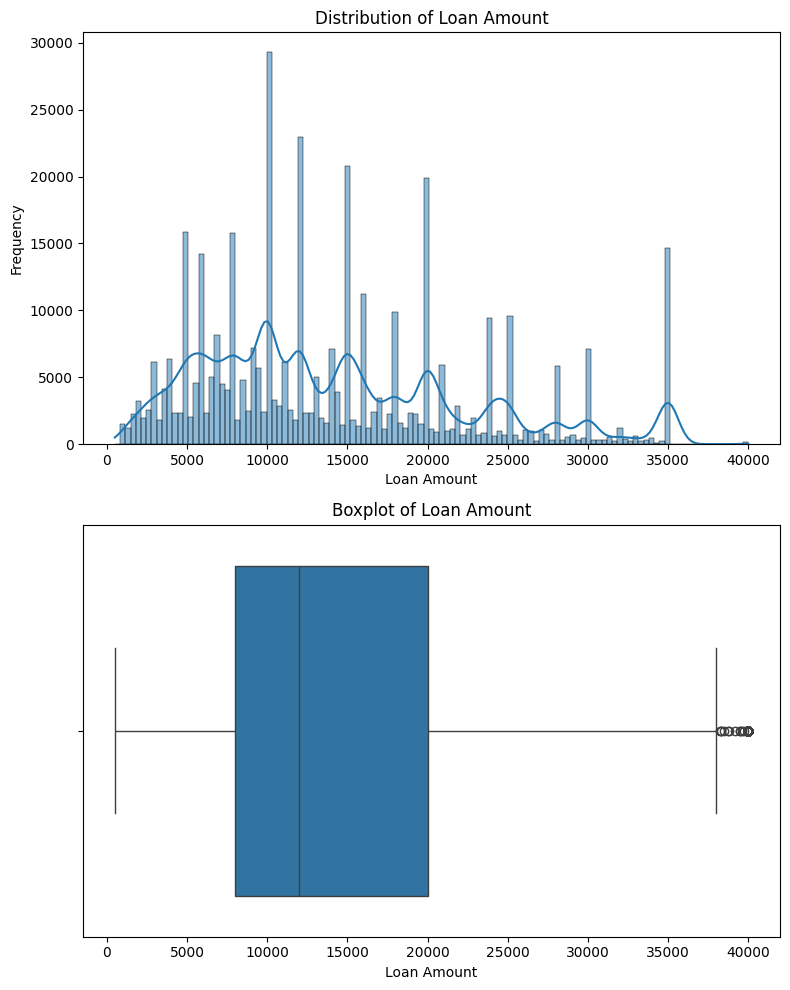

In [229]:
#Distribution of loan amount
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

sns.histplot(df['loan_amnt'], kde=True, ax=axes[0])
axes[0].set_xlabel('Loan Amount')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Loan Amount')

sns.boxplot(x=df['loan_amnt'], ax=axes[1])
axes[1].set_xlabel('Loan Amount')
axes[1].set_title('Boxplot of Loan Amount')

plt.tight_layout()
plt.show()

This chart illustrates the distribution of loan amounts across the dataset. The histogram shows that loan amounts are spread widely, ranging from very small values up to nearly 40,000. There are several noticeable spikes at specific amounts (around 10,000, 15,000, 20,000, and 35,000), suggesting that loans are often issued in standardized slabs rather than random amounts. The majority of loans are concentrated in the lower to mid ranges (5,000–20,000), with frequencies tapering off for higher loan amounts. This indicates that smaller and mid-sized loans are far more common than larger ones.

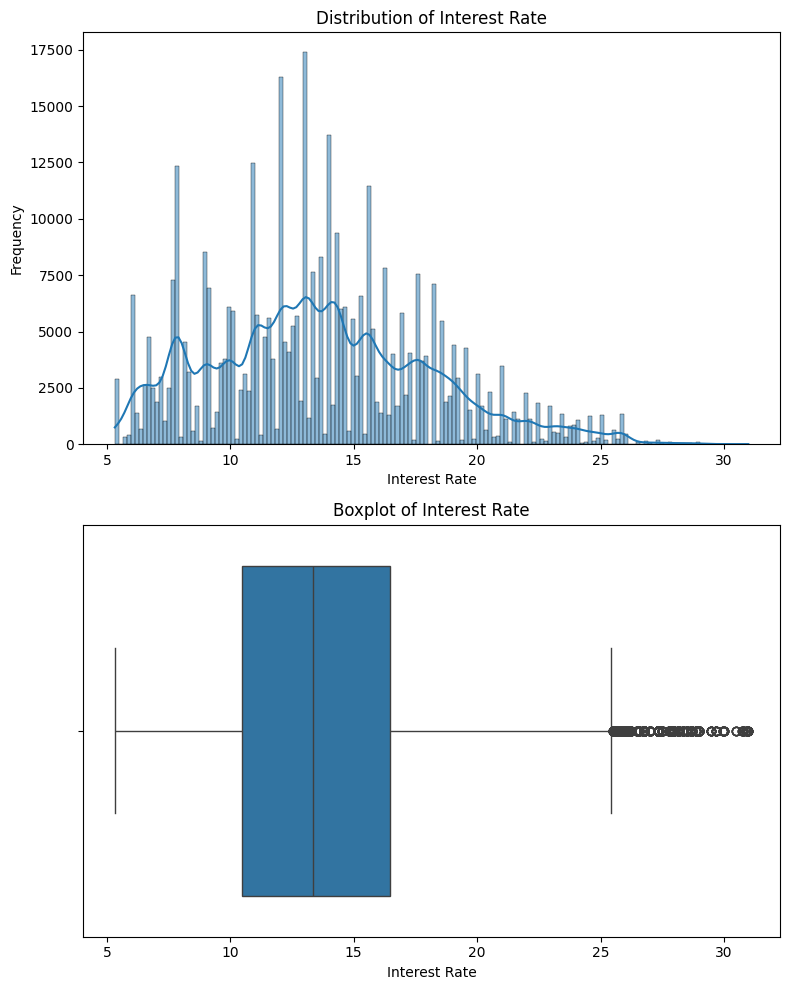

In [230]:
#Distribution of Interest Rates
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

sns.histplot(df['int_rate'], kde=True, ax=axes[0])
axes[0].set_xlabel('Interest Rate')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Interest Rate')

sns.boxplot(x=df['int_rate'], ax=axes[1])
axes[1].set_xlabel('Interest Rate')
axes[1].set_title('Boxplot of Interest Rate')

plt.tight_layout()
plt.show()

This chart illustrates the distribution of interest rates. The distribution shows interest rates are between 5% and 30%. Interest rates between 10% and 17% have highest frequency. There distribution is slightly positive skewed with potential outliers over the 25% rate.

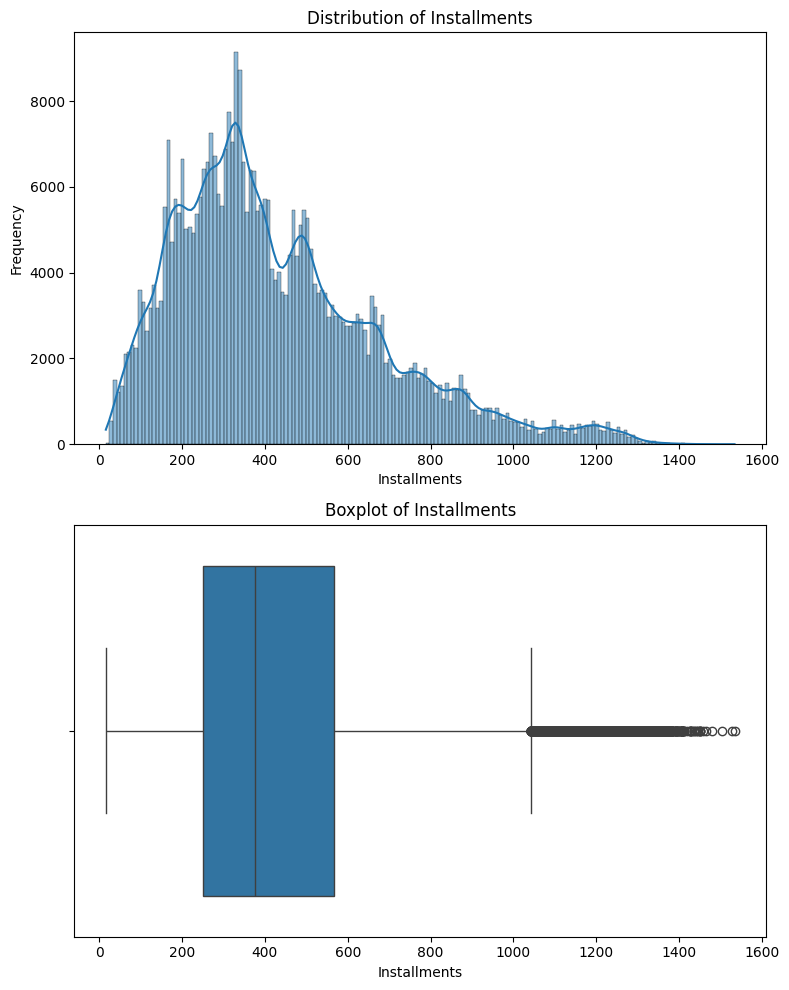

In [231]:
#Distribution of Installments
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

sns.histplot(df['installment'], kde=True, ax=axes[0])
axes[0].set_xlabel('Installments')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Installments')

sns.boxplot(x=df['installment'], ax=axes[1])
axes[1].set_xlabel('Installments')
axes[1].set_title('Boxplot of Installments')

plt.tight_layout()
plt.show()

The graphs above illustrates the distributio nof installments paid by customers. Most installments are between Rs200 and Rs600 per month with a median of about 380. The distribution is slightly positive skewed with potential outliers over Rs1000.

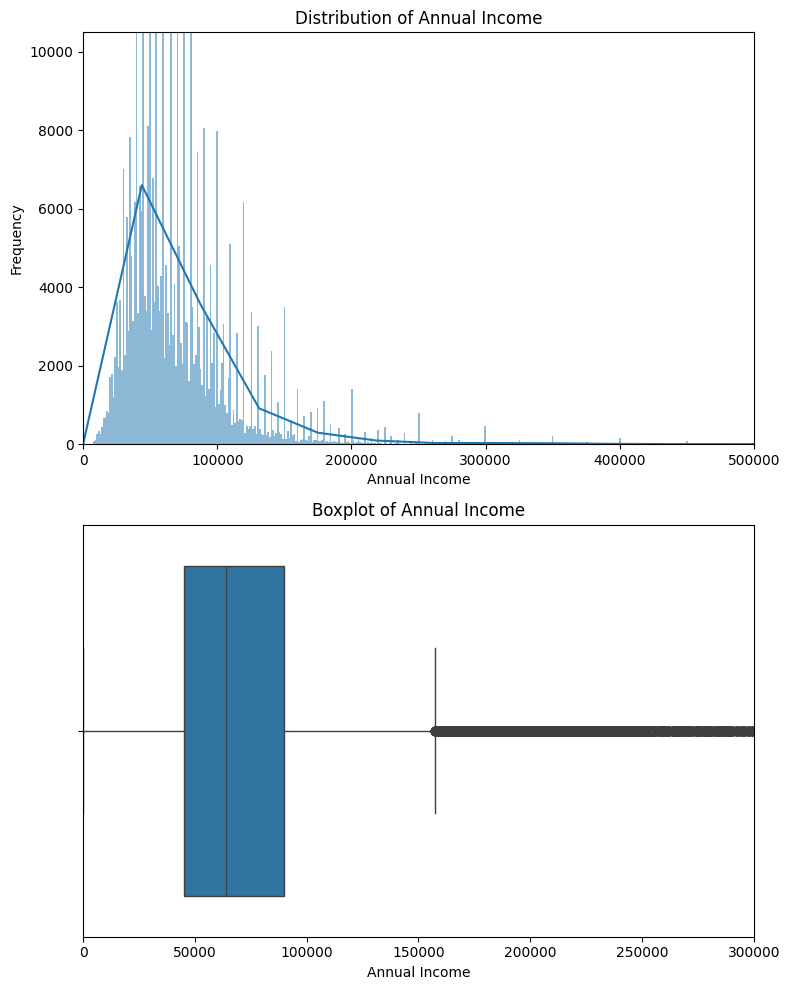

In [232]:
#Distribution of Annual Income
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

sns.histplot(df['annual_inc'], kde=True, ax=axes[0])
axes[0].set_xlim(0, 500000) # Set x-axis limit for histogram
axes[0].set_ylim(0, 10500) # Set y-axis limit for histogram
axes[0].set_xlabel('Annual Income')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Annual Income')

sns.boxplot(x=df['annual_inc'], ax=axes[1])
axes[1].set_xlim(0, 300000) # Set x-axis limit for boxplot
axes[1].set_xlabel('Annual Income')
axes[1].set_title('Boxplot of Annual Income')

plt.tight_layout()
plt.show()

The above graph illustrates the distribution of annual income in the data set. Most values are between 45000 and 100000 with a median of around 60000. Even though the maximum value of annual income is high,  the spread of loans taken is small.There are outliers in this dataset which we can review as we move on.

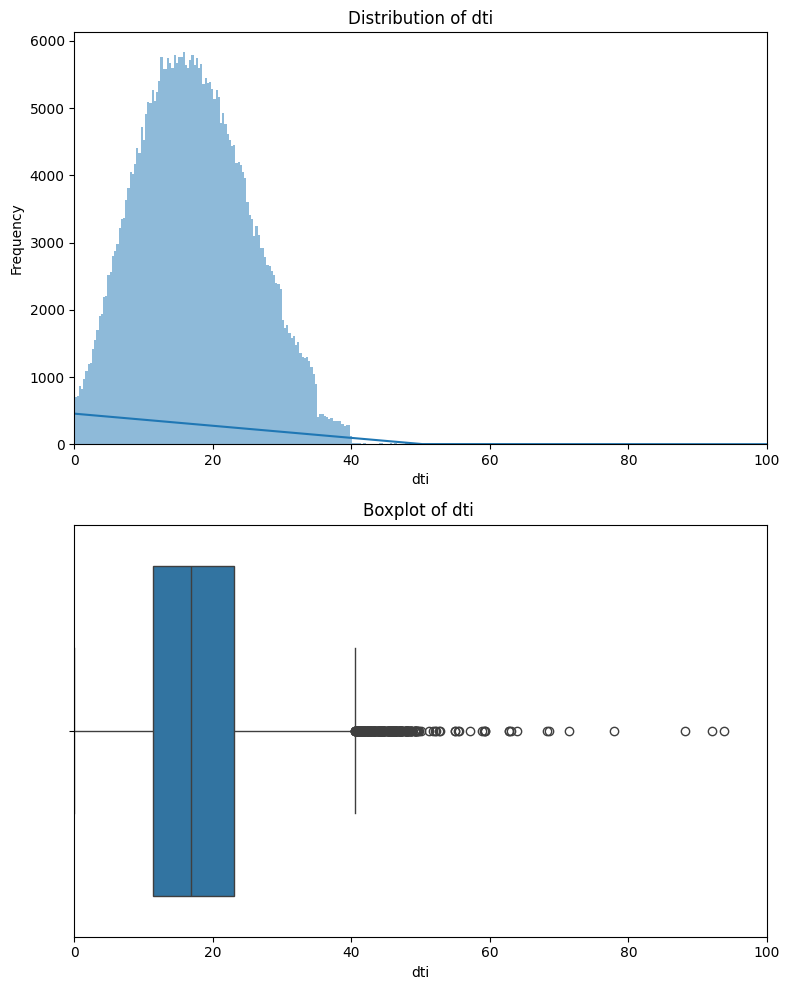

In [233]:
#Distribution of DTI
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

sns.histplot(df['dti'], kde=True, ax=axes[0])
axes[0].set_xlim(0, 100)
axes[0].set_xlabel('dti')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of dti')

sns.boxplot(x=df['dti'], ax=axes[1])
axes[1].set_xlim(0, 100)

axes[1].set_xlabel('dti')
axes[1].set_title('Boxplot of dti ')

plt.tight_layout()
plt.show()

The graph above represents the debt to income ratio (dti). it can be see most values are between 15 and 25. Most banks in india prefer a dti less than 40 and that can be reason why most outliers are above 40 in this dataset.


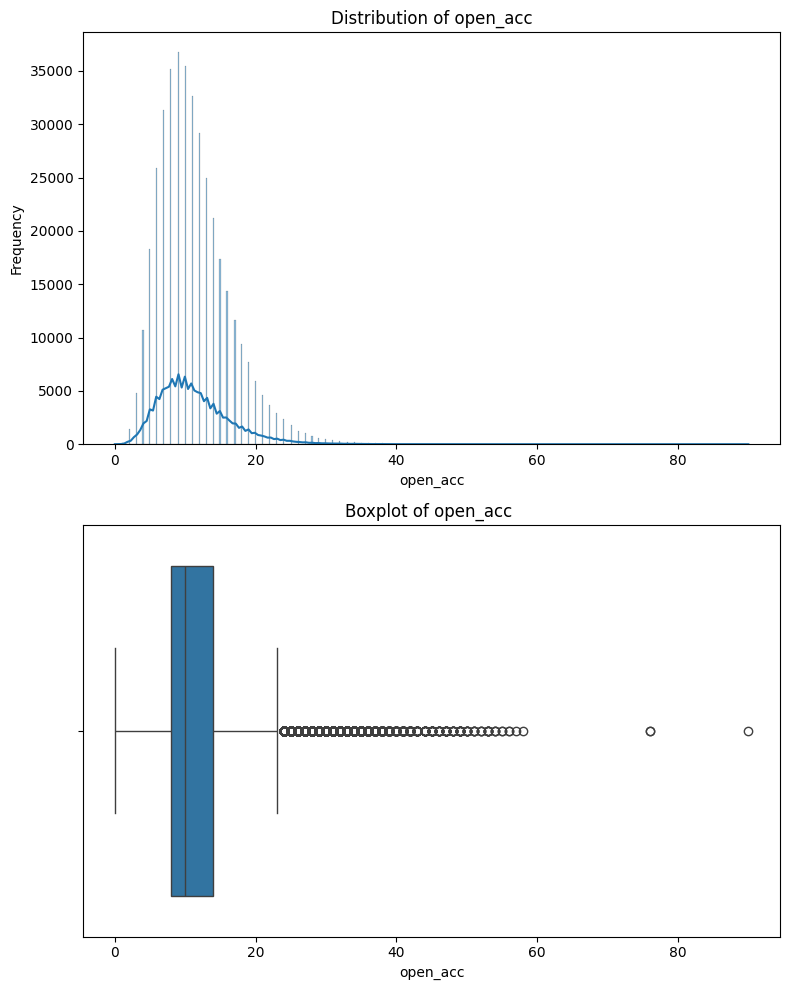

In [234]:
#Distribution of open_acc
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

sns.histplot(df['open_acc'], kde=True, ax=axes[0])

axes[0].set_xlabel('open_acc')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of open_acc')

sns.boxplot(x=df['open_acc'], ax=axes[1])


axes[1].set_xlabel('open_acc')
axes[1].set_title('Boxplot of open_acc ')

plt.tight_layout()
plt.show()


The graph represents the line of credit(open_acc) for customers. . In this dataset we can see most values are betwwn 10% and 16% with the median at around 12%.

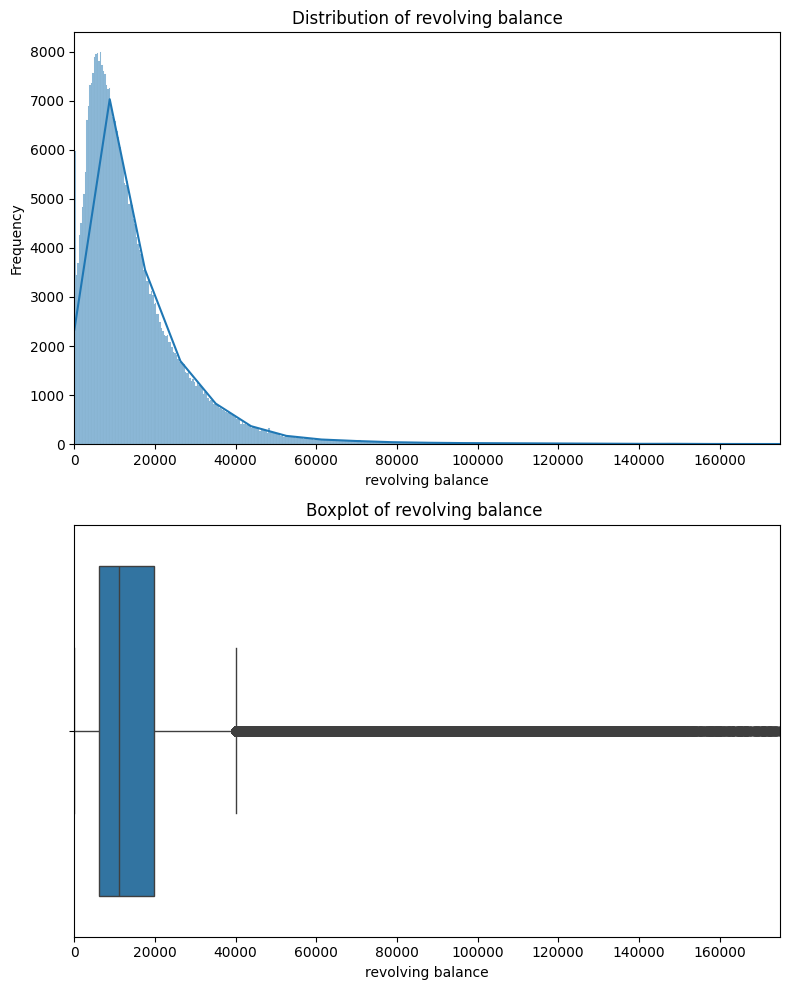

In [235]:
#Distribution of revolving balance
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

sns.histplot(df['revol_bal'], kde=True, ax=axes[0])
axes[0].set_xlim(0, 175000)
axes[0].set_xlabel('revolving balance')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of revolving balance')

sns.boxplot(x=df['revol_bal'], ax=axes[1])

axes[1].set_xlim(0, 175000)
axes[1].set_xlabel('revolving balance')
axes[1].set_title('Boxplot of revolving balance ')

plt.tight_layout()
plt.show()

This graph represents the distribution of revolving balance. it indicates that most customers are having a revolving balance between 8000 and 20000 with a median at 12000.The graph also indicates a lot of outliers beyond 40000.

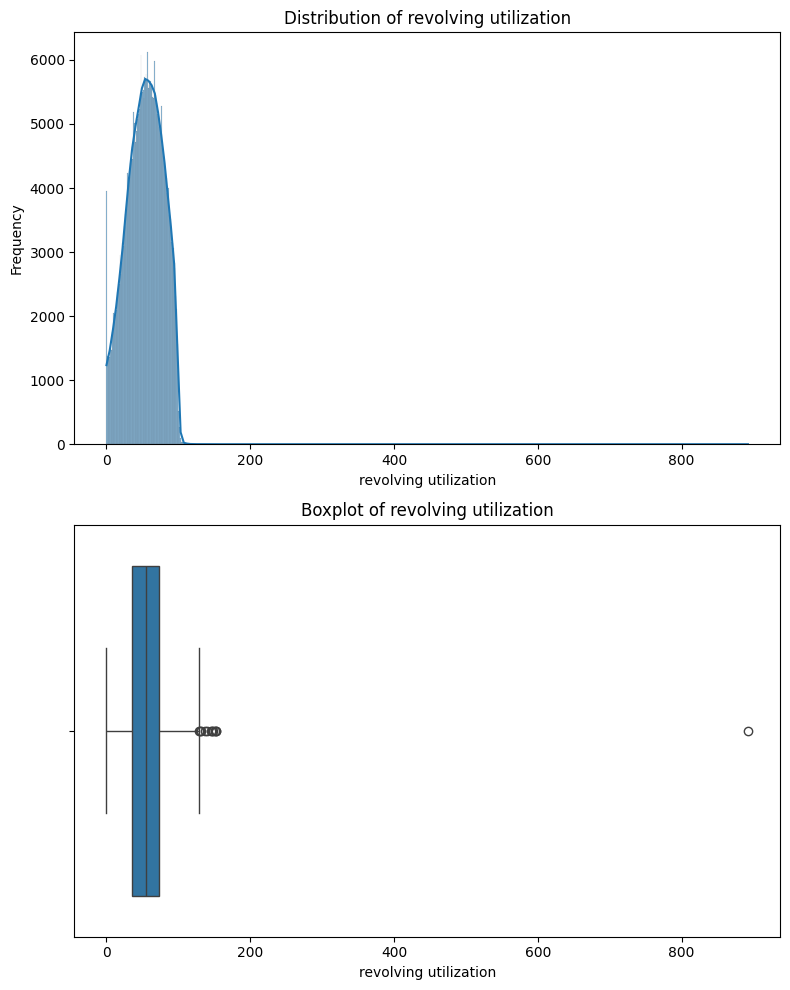

In [236]:
#Distribution of revolving utilization
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

sns.histplot(df['revol_util'], kde=True, ax=axes[0])

axes[0].set_xlabel('revolving utilization')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of revolving utilization')

sns.boxplot(x=df['revol_util'], ax=axes[1])


axes[1].set_xlabel('revolving utilization')
axes[1].set_title('Boxplot of revolving utilization')

plt.tight_layout()
plt.show()

This graph represents the distribution of revolving utilization. It indicates most customers have a range between 50-75 with amedian of 65.

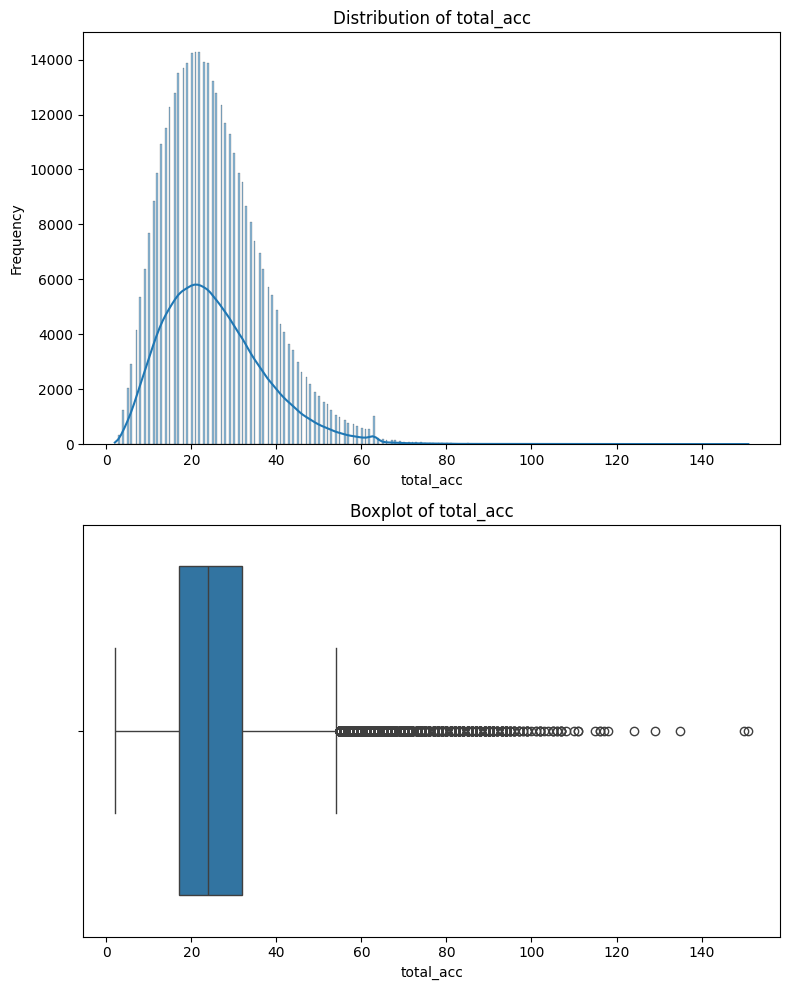

In [237]:
#Distribution of total_acc
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

sns.histplot(df['total_acc'], kde=True, ax=axes[0])

axes[0].set_xlabel('total_acc')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of total_acc')

sns.boxplot(x=df['total_acc'], ax=axes[1])


axes[1].set_xlabel('total_acc')
axes[1].set_title('Boxplot of total_acc')

plt.tight_layout()
plt.show()

This graph represents the distribution of total number of credit lines

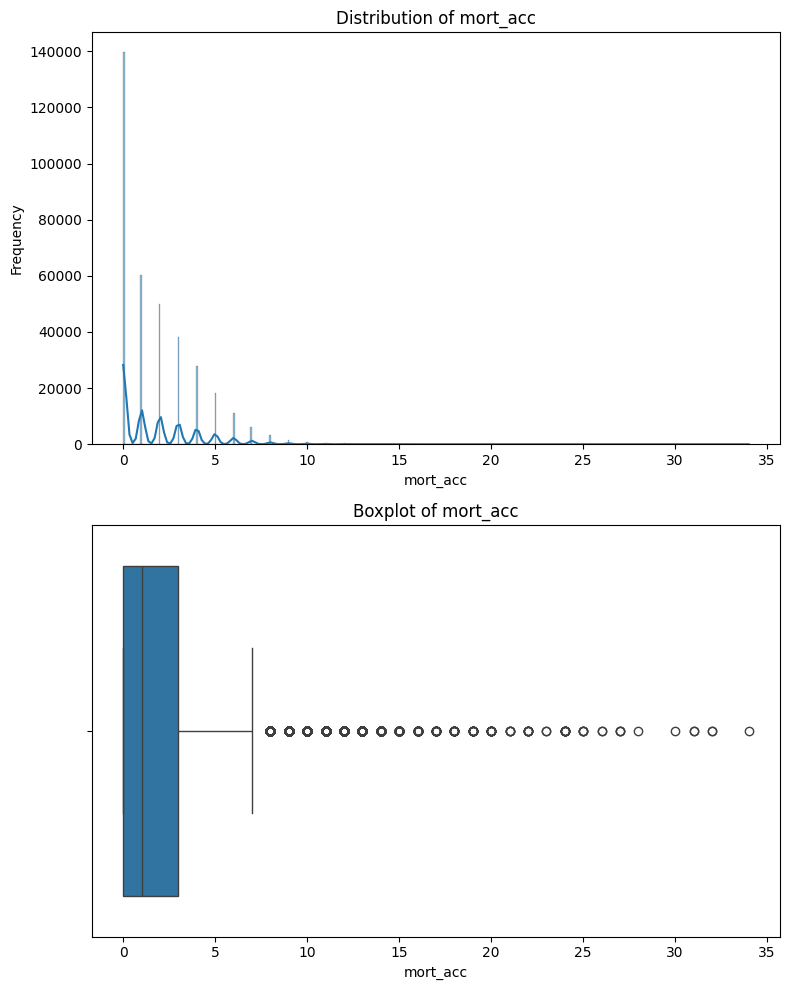

In [238]:
#Distribution of mort_acc
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

sns.histplot(df['mort_acc'], kde=True, ax=axes[0])

axes[0].set_xlabel('mort_acc')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of mort_acc')

sns.boxplot(x=df['mort_acc'], ax=axes[1])


axes[1].set_xlabel('mort_acc')
axes[1].set_title('Boxplot of mort_acc')

plt.tight_layout()
plt.show()

This graph represents the distribution of number of mortigages. Most values lies between 0 and 3 with a median of 2.

##Bivariate Analysis and Multivariate Analysis

In [239]:
num_col = ['loan_amnt','int_rate','installment','annual_inc','dti','open_acc','revol_bal','revol_util','total_acc','mort_acc']

1. Loan Amount (loan_amnt)

    Strong positive linear relation with installment.

    No clear trend with int_rate or annual_inc.

    Distribution is right-skewed, with clusters at round figures.

2. Term

    Borrowers with longer terms (60 months) tend to have higher loan amounts and installments.

    No clear relation with int_rate or income.

3. Interest Rate (int_rate)

    No linear correlation with loan_amnt or annual_inc.

    Certain slabs are common (10–15%, 20%).

4. Installment

    Directly proportional to loan_amnt (as expected).

    No obvious relationship with income or DTI.

5. Annual Income (annual_inc)

    Heavily right-skewed due to a few very high-income outliers.

    Weak/no correlation with loan_amnt or dti.

6. Debt-to-Income Ratio (dti)

    Wide scatter across annual_inc, showing no strong trend.

    Distribution suggests most borrowers are clustered at lower DTI levels.

7. Delinquencies in Last 2 Years (delinq_2yrs)

    Mostly concentrated at 0 (few borrowers with delinquencies).

    No significant correlation with loan amount or income.

8. Inquiries in Last 6 Months (inq_last_6mths)

    Majority near 0–2, with very few outliers.

    Not strongly related to other variables.

9. Open Credit Lines (open_acc)

    Positive correlation with total_acc (expected).

    No significant link with loan amount or income.

10. Public Records (pub_rec)

    Mostly concentrated at 0.

    No meaningful correlation with other features.

11. Revolving Balance (revol_bal)

    Wide range, right-skewed distribution.

    Weak/no relation with loan amount or annual income.

12. Revolving Utilization (revol_util)

    Broad spread of values (0–100%).

    No clear relation with loan amount or income.

13. Total Credit Lines (total_acc)

    Correlates with open_acc.

    No strong relation with loan amount, income, or interest rate.

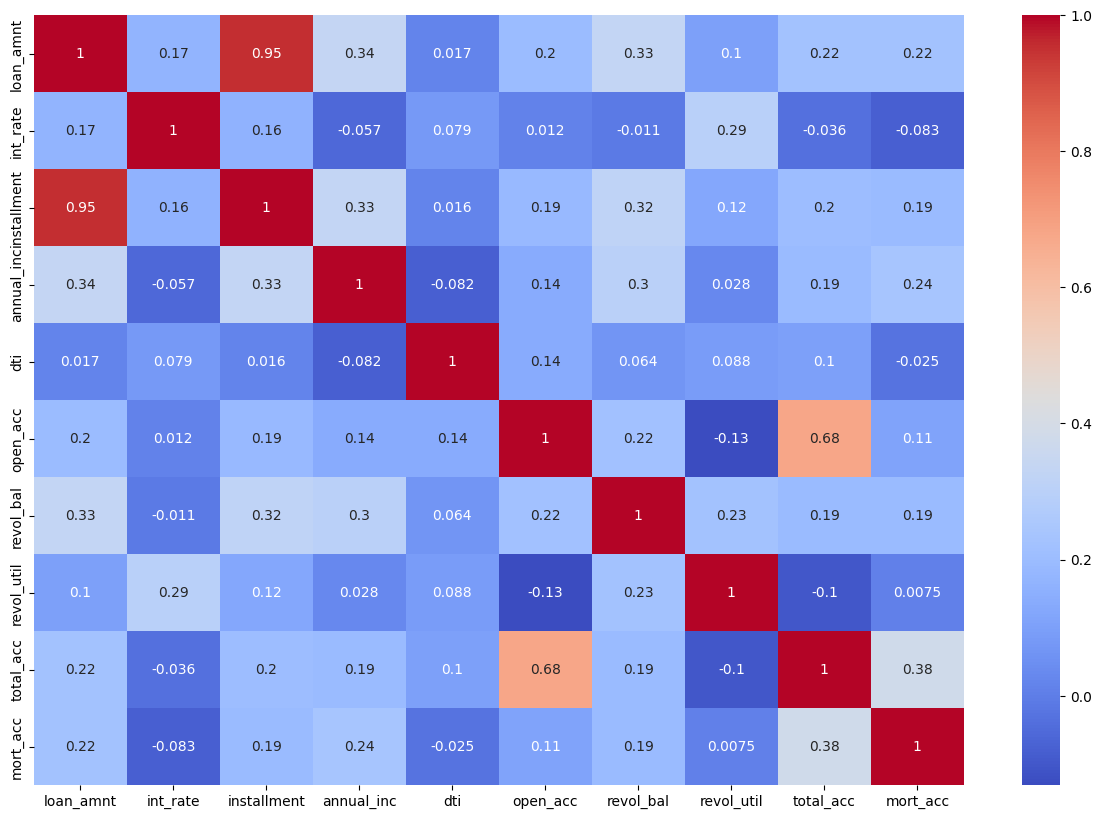

In [240]:
#Correlation Heat map
plt.figure(figsize=(15, 10))
sns.heatmap(df[num_col].corr(), annot=True, cmap='coolwarm')
plt.show()

The diagram above is a correlation matrix of numerical columns of the dataset. It indicates a strong positive relationship between installement-loan amount and open acc-total acc. Revolving balance and loan amount shows a positive relationship but not a very strong one.

##Data Preprocessing

In [241]:
#Check for duplicate values
df.duplicated().sum()

np.int64(0)

There are no duplicate values in this dataset.

MIssing value treatement

employee title, employee length, title, revolving utilization rate, Mortgage acc, Public record bankruptcies - These columns have missing values.

In [242]:
#Employee title missing value treatment

#check number of unique values
df['emp_title'].nunique()

173105

In [243]:
# Replace missing value with 'others'
df['emp_title'] = df['emp_title'].fillna('others')

In [244]:
df['emp_title'].isnull().sum() # CHecking if there are any more null values

np.int64(0)

In [245]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,0
emp_length,0
home_ownership,0
annual_inc,0


In [246]:
#Title null values can be 'others'
df['title'] = df['title'].fillna('others')

In [247]:
#Missing values in revolving utilization

df['revol_util'].describe()#CHeck descriptio of column

,revol_util
count,395754.00
mean,53.79
std,24.45
min,0.00
25%,35.80
50%,54.80
75%,72.90
max,892.30


In [248]:
df['revol_util'].median()

54.8

In [249]:
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].median())  # added the column median into the replacement of missing values

In [250]:
df['revol_bal'].isnull().sum()

np.int64(0)

In [251]:
#Checking description of mortg_Acc
df['mort_acc'].describe()

,mort_acc
count,358235.00
mean,1.81
std,2.15
min,0.00
25%,0.00
50%,1.00
75%,3.00
max,34.00


In [252]:
df['mort_acc'].fillna({'mort_acc' : df['mort_acc'].mean()}, inplace=True)

/tmp/ipython-input-3884389459.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mort_acc'].fillna({'mort_acc' : df['mort_acc'].mean()}, inplace=True)


In [253]:
df['mort_acc'].isnull().sum()

np.int64(37795)

In [254]:
#public record bankruptcy
df['pub_rec_bankruptcies'].describe()

,pub_rec_bankruptcies
count,395495.00
mean,0.12
std,0.36
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,8.00


In [255]:
#public record bankruptcy
mean_pub_rec_bankruptcies = df['pub_rec_bankruptcies'].mean()
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(mean_pub_rec_bankruptcies)

In [256]:
df['pub_rec_bankruptcies'].isnull().sum()

np.int64(0)

In [257]:
#Loan amount outlier treatment
df['loan_amnt'].describe()

,loan_amnt
count,396030.00
mean,14113.89
std,8357.44
min,500.00
25%,8000.00
50%,12000.00
75%,20000.00
max,40000.00


In [258]:
# replace outlier values of loan amount with 20000
df.loc[df['loan_amnt'] > 35000, 'loan_amnt'] = 20000


<Axes: xlabel='loan_amnt'>

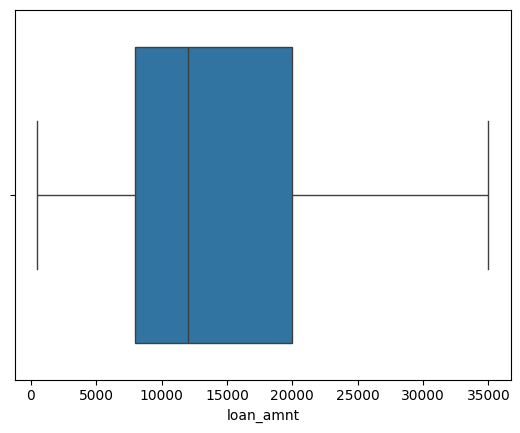

In [259]:
sns.boxplot(x=df['loan_amnt'])

THe outliers have been handled by using the upper limit value.

In [260]:
#Interest rate outlier treament
df['int_rate'].describe()

,int_rate
count,396030.00
mean,13.64
std,4.47
min,5.32
25%,10.49
50%,13.33
75%,16.49
max,30.99


In [261]:
df.loc[df['int_rate'] > 25, 'int_rate'] = 16.49 ##replace outlier values with 75% val

<Axes: xlabel='int_rate'>

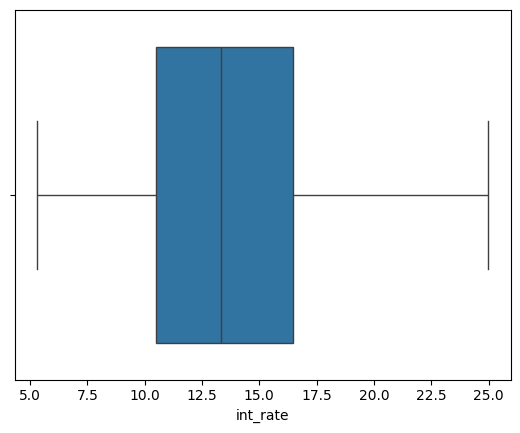

In [262]:
sns.boxplot(x=df['int_rate'])

THe outliers have been handled by using the upper limit value.

In [263]:
#installement outlier treatment
df['installment'].describe()

,installment
count,396030.00
mean,431.85
std,250.73
min,16.08
25%,250.33
50%,375.43
75%,567.30
max,1533.81


In [264]:
df.loc[df['installment'] > 1000, 'installment'] = 367 #replace outlier values with 75% val

<Axes: xlabel='installment'>

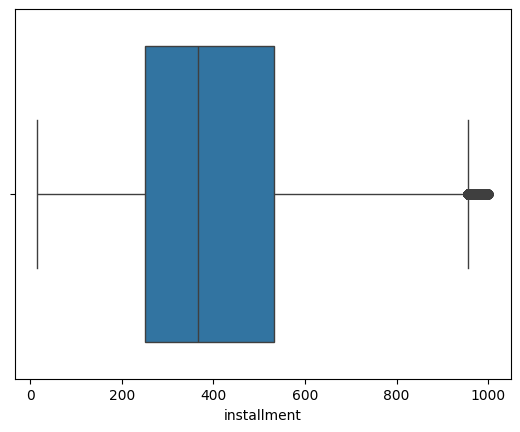

In [265]:
sns.boxplot(x=df['installment'])

THe outliers have been handled by using the upper limit value.

In [266]:
#annual income outlier tretment
pd.set_option('display.float_format', '{:.2f}'.format)
df['annual_inc'].describe()

,annual_inc
count,396030.00
mean,74203.18
std,61637.62
min,0.00
25%,45000.00
50%,64000.00
75%,90000.00
max,8706582.00


In [267]:
df.loc[df['annual_inc'] > 150000, 'annual_inc'] = 90000 #replace outlier values with 75% val

<Axes: xlabel='annual_inc'>

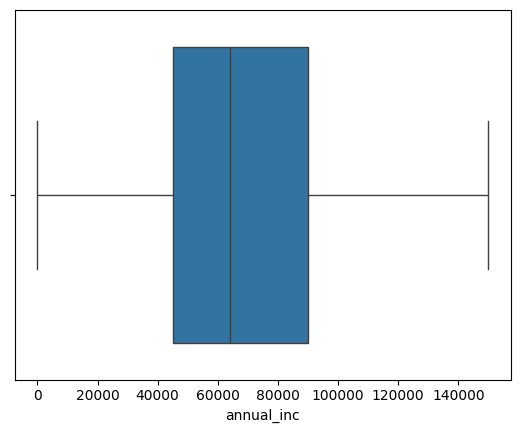

In [268]:
sns.boxplot(x=df['annual_inc'])

THe outliers have been handled by using the upper limit value.

In [269]:
#debt to income (dti) outlier treatment
df['dti'].describe()

,dti
count,396030.00
mean,17.38
std,18.02
min,0.00
25%,11.28
50%,16.91
75%,22.98
max,9999.00


In [270]:
df.loc[df['dti'] > 40, 'dti'] = 23 #replace outlier values with 75% val

<Axes: xlabel='dti'>

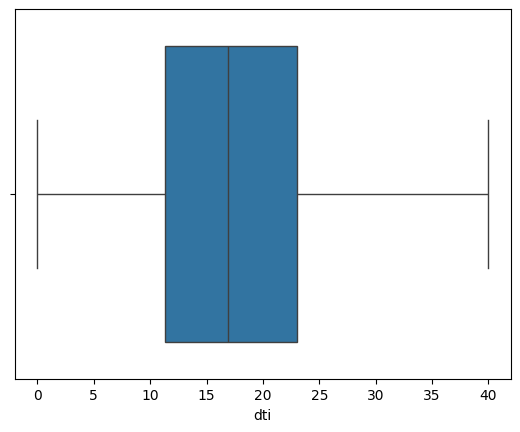

In [271]:
sns.boxplot(x=df['dti'])

THe outliers have been handled by using the upper limit value.

In [272]:
#open_Acc outlier treatment
df['open_acc'].describe()

,open_acc
count,396030.00
mean,11.31
std,5.14
min,0.00
25%,8.00
50%,10.00
75%,14.00
max,90.00


In [273]:
df.loc[df['open_acc'] > 22, 'open_acc'] = 14 #replace outlier values with 75% val

<Axes: xlabel='open_acc'>

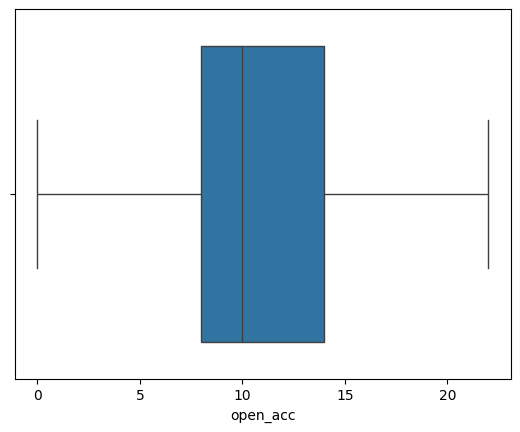

In [274]:
sns.boxplot(x=df['open_acc'])

THe outliers have been handled by using the upper limit value.

In [275]:
#revolving balanc eoutlier treatment
df['revol_bal'].describe()

,revol_bal
count,396030.00
mean,15844.54
std,20591.84
min,0.00
25%,6025.00
50%,11181.00
75%,19620.00
max,1743266.00


In [276]:
df.loc[df['revol_bal'] > 40000, 'revol_bal'] = 19620 #replace outlier values with 75% val

<Axes: xlabel='revol_bal'>

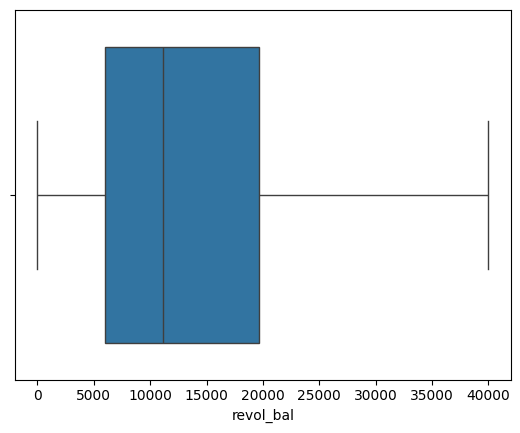

In [277]:
sns.boxplot(x=df['revol_bal'])

THe outliers have been handled by using the upper limit value.

In [278]:
#revolving utilization outlier treatment
df['revol_util'].describe()

,revol_util
count,396030.00
mean,53.79
std,24.44
min,0.00
25%,35.90
50%,54.80
75%,72.90
max,892.30


In [279]:
df.loc[df['revol_util'] > 120, 'revol_util'] = 73 #replace outlier values with 75% val

<Axes: xlabel='revol_util'>

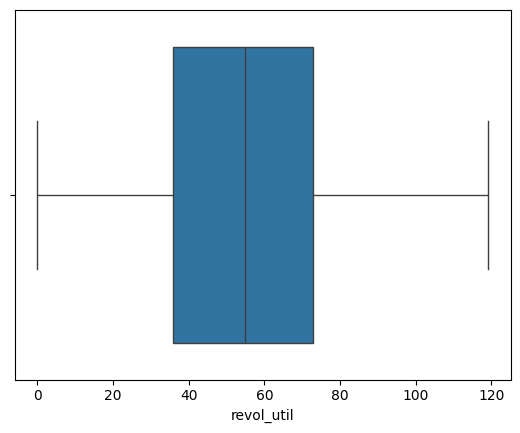

In [280]:
sns.boxplot(x=df['revol_util'])

THe outliers have been handled by using the upper limit value.

In [281]:
#total_acc outlier treatment
df['total_acc'].describe()

,total_acc
count,396030.00
mean,25.41
std,11.89
min,2.00
25%,17.00
50%,24.00
75%,32.00
max,151.00


In [282]:
df.loc[df['total_acc'] > 50, 'total_acc'] = 32 #replace outlier values with 75% val

<Axes: xlabel='total_acc'>

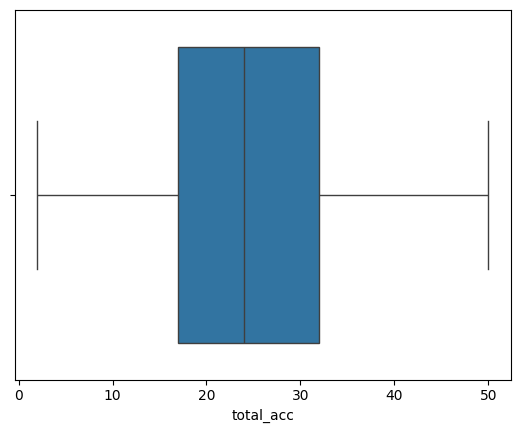

In [283]:
sns.boxplot(x=df['total_acc'])

THe outliers have been handled by using the upper limit value.

In [284]:
#mort_acc outlier treatment
df['mort_acc'].describe()

,mort_acc
count,358235.00
mean,1.81
std,2.15
min,0.00
25%,0.00
50%,1.00
75%,3.00
max,34.00


In [285]:
df.loc[df['mort_acc'] > 6, 'mort_acc'] = 3 #replace outlier values with 75% val

<Axes: xlabel='mort_acc'>

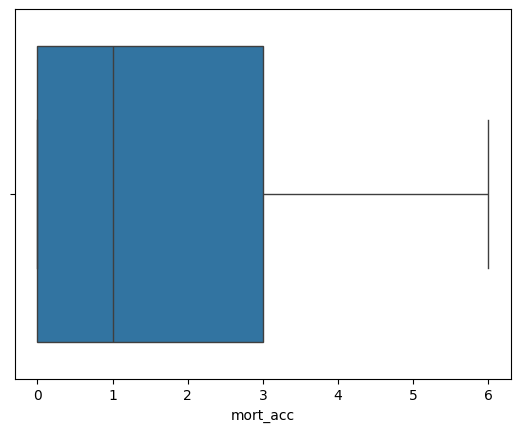

In [286]:
sns.boxplot(x=df['mort_acc'])

Feature Engineering
  

THe outliers have been handled by using the upper limit value.

In [287]:
df_orginal = df.copy()

In [288]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.00,36 months,11.44,329.48,B,B4,Marketing,10,RENT,117000.00,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,1990,16.00,0.00,36369.00,41.80,25.00,w,INDIVIDUAL,0.00,0.00,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.00,36 months,11.99,265.68,B,B5,Credit analyst,4,MORTGAGE,65000.00,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,2004,17.00,0.00,20131.00,53.30,27.00,f,INDIVIDUAL,3.00,0.00,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.00,36 months,10.49,506.97,B,B3,Statistician,1,RENT,43057.00,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,2007,13.00,0.00,11987.00,92.20,26.00,f,INDIVIDUAL,0.00,0.00,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.00,36 months,6.49,220.65,A,A2,Client Advocate,6,RENT,54000.00,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,2006,6.00,0.00,5472.00,21.50,13.00,f,INDIVIDUAL,0.00,0.00,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.00,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9,MORTGAGE,55000.00,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,1999,13.00,0.00,24584.00,69.80,43.00,f,INDIVIDUAL,1.00,0.00,"679 Luna Roads\r\nGreggshire, VA 11650"


In [289]:
#create binary flag for pub_rec
df['pub_rec_flag'] = df['pub_rec'].apply(lambda x: 1 if x > 0 else 0)

In [290]:
#convert dtype to int
df['pub_rec'] = df['pub_rec'].astype(int)

In [291]:
#create binary flag for mort_acc
df['mort_acc_flag'] = df['mort_acc'].apply(lambda x: 1 if x > 0 else 0)
df['mort_acc_flag'] = df['mort_acc_flag'].astype(int)

In [292]:
#create binary flag for pub_rec_bankruptcies
df['pub_rec_bankruptcies_flag'] = df['pub_rec_bankruptcies'].apply(lambda x: 1 if x > 0 else 0)
df['pub_rec_bankruptcies_flag'] = df['pub_rec_bankruptcies_flag'].astype(int)

In [293]:
df['term'].value_counts()

,count
term,
36 months,302005
60 months,94025


In [294]:
#term to be converted to  binary values , 36months = 1 , 60months = 0
df['term'] = df['term'].apply(lambda x: 1 if x.strip() == '36 months' else 0)

In [295]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,pub_rec_flag,mort_acc_flag,pub_rec_bankruptcies_flag
0,10000.00,1,11.44,329.48,B,B4,Marketing,10,RENT,117000.00,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,1990,16.00,0,36369.00,41.80,25.00,w,INDIVIDUAL,0.00,0.00,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",0,0,0
1,8000.00,1,11.99,265.68,B,B5,Credit analyst,4,MORTGAGE,65000.00,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,2004,17.00,0,20131.00,53.30,27.00,f,INDIVIDUAL,3.00,0.00,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",0,1,0
2,15600.00,1,10.49,506.97,B,B3,Statistician,1,RENT,43057.00,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,2007,13.00,0,11987.00,92.20,26.00,f,INDIVIDUAL,0.00,0.00,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",0,0,0
3,7200.00,1,6.49,220.65,A,A2,Client Advocate,6,RENT,54000.00,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,2006,6.00,0,5472.00,21.50,13.00,f,INDIVIDUAL,0.00,0.00,"823 Reid Ford\r\nDelacruzside, MA 00813",0,0,0
4,24375.00,0,17.27,609.33,C,C5,Destiny Management Inc.,9,MORTGAGE,55000.00,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,1999,13.00,0,24584.00,69.80,43.00,f,INDIVIDUAL,1.00,0.00,"679 Luna Roads\r\nGreggshire, VA 11650",0,1,0


In [296]:
#change grade to ordinal
# Define mapping for grades
grade_map = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}

# Apply mapping to your DataFrame
df['grade_encoded'] = df['grade'].map(grade_map)



In [297]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,pub_rec_flag,mort_acc_flag,pub_rec_bankruptcies_flag,grade_encoded
0,10000.00,1,11.44,329.48,B,B4,Marketing,10,RENT,117000.00,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,1990,16.00,0,36369.00,41.80,25.00,w,INDIVIDUAL,0.00,0.00,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",0,0,0,2
1,8000.00,1,11.99,265.68,B,B5,Credit analyst,4,MORTGAGE,65000.00,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,2004,17.00,0,20131.00,53.30,27.00,f,INDIVIDUAL,3.00,0.00,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",0,1,0,2
2,15600.00,1,10.49,506.97,B,B3,Statistician,1,RENT,43057.00,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,2007,13.00,0,11987.00,92.20,26.00,f,INDIVIDUAL,0.00,0.00,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",0,0,0,2
3,7200.00,1,6.49,220.65,A,A2,Client Advocate,6,RENT,54000.00,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,2006,6.00,0,5472.00,21.50,13.00,f,INDIVIDUAL,0.00,0.00,"823 Reid Ford\r\nDelacruzside, MA 00813",0,0,0,1
4,24375.00,0,17.27,609.33,C,C5,Destiny Management Inc.,9,MORTGAGE,55000.00,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,1999,13.00,0,24584.00,69.80,43.00,f,INDIVIDUAL,1.00,0.00,"679 Luna Roads\r\nGreggshire, VA 11650",0,1,0,3


In [298]:
#Encode subgrade
import pandas as pd

# Example: create an ordered list of all sub_grades
subgrades = [g+str(i) for g in list("ABCDEFG") for i in range(1,6)]

# Create mapping (A1=1, A2=2, ..., G5=35)
subgrade_map = {sg: idx+1 for idx, sg in enumerate(subgrades)}

# Apply to DataFrame
df['sub_grade_encoded'] = df['sub_grade'].map(subgrade_map)

# Check result
print(df[['sub_grade','sub_grade_encoded']].head())


  sub_grade  sub_grade_encoded
0        B4                  9
1        B5                 10
2        B3                  8
3        A2                  2
4        C5                 15


In [299]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,pub_rec_flag,mort_acc_flag,pub_rec_bankruptcies_flag,grade_encoded,sub_grade_encoded
0,10000.00,1,11.44,329.48,B,B4,Marketing,10,RENT,117000.00,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,1990,16.00,0,36369.00,41.80,25.00,w,INDIVIDUAL,0.00,0.00,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",0,0,0,2,9
1,8000.00,1,11.99,265.68,B,B5,Credit analyst,4,MORTGAGE,65000.00,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,2004,17.00,0,20131.00,53.30,27.00,f,INDIVIDUAL,3.00,0.00,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",0,1,0,2,10
2,15600.00,1,10.49,506.97,B,B3,Statistician,1,RENT,43057.00,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,2007,13.00,0,11987.00,92.20,26.00,f,INDIVIDUAL,0.00,0.00,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",0,0,0,2,8
3,7200.00,1,6.49,220.65,A,A2,Client Advocate,6,RENT,54000.00,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,2006,6.00,0,5472.00,21.50,13.00,f,INDIVIDUAL,0.00,0.00,"823 Reid Ford\r\nDelacruzside, MA 00813",0,0,0,1,2
4,24375.00,0,17.27,609.33,C,C5,Destiny Management Inc.,9,MORTGAGE,55000.00,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,1999,13.00,0,24584.00,69.80,43.00,f,INDIVIDUAL,1.00,0.00,"679 Luna Roads\r\nGreggshire, VA 11650",0,1,0,3,15


In [300]:
#drop grade and subgrade
df.drop(['grade', 'sub_grade'], axis=1, inplace=True)

In [301]:
df['emp_title'].unique()

array(['Marketing', 'Credit analyst ', 'Statistician', ...,
       "Michael's Arts & Crafts", 'licensed bankere',
       'Gracon Services, Inc'], dtype=object)

In [302]:
df.drop(['emp_title'],axis = 1, inplace = True)

In [303]:
df['home_ownership'].nunique()

6

In [304]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [305]:
#change home ownership to ordinal
# Define mapping for grades
home_ownership_map = {'RENT': 1, 'MORTGAGE': 2, 'OWN': 3, 'OTHER': 4, 'NONE': 5, 'ANY': 6}

# Apply mapping to your DataFrame
df['home_ownership_encoded'] = df['home_ownership'].map(home_ownership_map)

In [306]:
df.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,pub_rec_flag,mort_acc_flag,pub_rec_bankruptcies_flag,grade_encoded,sub_grade_encoded,home_ownership_encoded
0,10000.00,1,11.44,329.48,10,RENT,117000.00,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,1990,16.00,0,36369.00,41.80,25.00,w,INDIVIDUAL,0.00,0.00,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",0,0,0,2,9,1
1,8000.00,1,11.99,265.68,4,MORTGAGE,65000.00,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,2004,17.00,0,20131.00,53.30,27.00,f,INDIVIDUAL,3.00,0.00,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",0,1,0,2,10,2
2,15600.00,1,10.49,506.97,1,RENT,43057.00,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,2007,13.00,0,11987.00,92.20,26.00,f,INDIVIDUAL,0.00,0.00,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",0,0,0,2,8,1
3,7200.00,1,6.49,220.65,6,RENT,54000.00,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,2006,6.00,0,5472.00,21.50,13.00,f,INDIVIDUAL,0.00,0.00,"823 Reid Ford\r\nDelacruzside, MA 00813",0,0,0,1,2,1
4,24375.00,0,17.27,609.33,9,MORTGAGE,55000.00,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,1999,13.00,0,24584.00,69.80,43.00,f,INDIVIDUAL,1.00,0.00,"679 Luna Roads\r\nGreggshire, VA 11650",0,1,0,3,15,2


In [307]:
df.drop('home_ownership', axis=1, inplace=True)

In [308]:
df['verification_status'].nunique()

3

In [309]:
df['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [310]:
#change verification status to ordinal
# Define mapping for grades
verification_status_map = {'Not Verified': 1, 'Source Verified': 2, 'Verified': 3}

# Apply mapping to your DataFrame
df['verification_status_encoded'] = df['verification_status'].map(verification_status_map)

In [311]:
#issue_d keep only the year
df['issue_d'] = df['issue_d'].str.split('-').str[1]

In [312]:
df.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,pub_rec_flag,mort_acc_flag,pub_rec_bankruptcies_flag,grade_encoded,sub_grade_encoded,home_ownership_encoded,verification_status_encoded
0,10000.00,1,11.44,329.48,10,117000.00,Not Verified,2015,Fully Paid,vacation,Vacation,26.24,1990,16.00,0,36369.00,41.80,25.00,w,INDIVIDUAL,0.00,0.00,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",0,0,0,2,9,1,1
1,8000.00,1,11.99,265.68,4,65000.00,Not Verified,2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,2004,17.00,0,20131.00,53.30,27.00,f,INDIVIDUAL,3.00,0.00,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",0,1,0,2,10,2,1
2,15600.00,1,10.49,506.97,1,43057.00,Source Verified,2015,Fully Paid,credit_card,Credit card refinancing,12.79,2007,13.00,0,11987.00,92.20,26.00,f,INDIVIDUAL,0.00,0.00,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",0,0,0,2,8,1,2
3,7200.00,1,6.49,220.65,6,54000.00,Not Verified,2014,Fully Paid,credit_card,Credit card refinancing,2.60,2006,6.00,0,5472.00,21.50,13.00,f,INDIVIDUAL,0.00,0.00,"823 Reid Ford\r\nDelacruzside, MA 00813",0,0,0,1,2,1,1
4,24375.00,0,17.27,609.33,9,55000.00,Verified,2013,Charged Off,credit_card,Credit Card Refinance,33.95,1999,13.00,0,24584.00,69.80,43.00,f,INDIVIDUAL,1.00,0.00,"679 Luna Roads\r\nGreggshire, VA 11650",0,1,0,3,15,2,3


In [313]:
df.drop('verification_status', axis=1, inplace=True)

In [314]:
#loan status to be converted to  binary values , fully paid = 1 , charged off = 0
df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)

In [315]:
df.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,pub_rec_flag,mort_acc_flag,pub_rec_bankruptcies_flag,grade_encoded,sub_grade_encoded,home_ownership_encoded,verification_status_encoded
0,10000.00,1,11.44,329.48,10,117000.00,2015,1,vacation,Vacation,26.24,1990,16.00,0,36369.00,41.80,25.00,w,INDIVIDUAL,0.00,0.00,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",0,0,0,2,9,1,1
1,8000.00,1,11.99,265.68,4,65000.00,2015,1,debt_consolidation,Debt consolidation,22.05,2004,17.00,0,20131.00,53.30,27.00,f,INDIVIDUAL,3.00,0.00,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",0,1,0,2,10,2,1
2,15600.00,1,10.49,506.97,1,43057.00,2015,1,credit_card,Credit card refinancing,12.79,2007,13.00,0,11987.00,92.20,26.00,f,INDIVIDUAL,0.00,0.00,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",0,0,0,2,8,1,2
3,7200.00,1,6.49,220.65,6,54000.00,2014,1,credit_card,Credit card refinancing,2.60,2006,6.00,0,5472.00,21.50,13.00,f,INDIVIDUAL,0.00,0.00,"823 Reid Ford\r\nDelacruzside, MA 00813",0,0,0,1,2,1,1
4,24375.00,0,17.27,609.33,9,55000.00,2013,0,credit_card,Credit Card Refinance,33.95,1999,13.00,0,24584.00,69.80,43.00,f,INDIVIDUAL,1.00,0.00,"679 Luna Roads\r\nGreggshire, VA 11650",0,1,0,3,15,2,3


In [316]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [317]:
df['purpose'].nunique()

14

In [318]:
#Change purpose to ordinal data

#define mapping for purpose
purpose_map = {'debt_consolidation': 1, 'credit_card': 2, 'home_improvement': 3, 'other': 4, 'major_purchase': 5,
               'small_business': 6, 'car': 7, 'medical': 8, 'moving': 9, 'vacation': 10, 'house': 11, 'wedding': 12,
               'educational': 13, 'renewable_energy': 14}

#apply mapping to your dataframe
df['purpose_encoded'] = df['purpose'].map(purpose_map)


In [319]:
df.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,pub_rec_flag,mort_acc_flag,pub_rec_bankruptcies_flag,grade_encoded,sub_grade_encoded,home_ownership_encoded,verification_status_encoded,purpose_encoded
0,10000.00,1,11.44,329.48,10,117000.00,2015,1,vacation,Vacation,26.24,1990,16.00,0,36369.00,41.80,25.00,w,INDIVIDUAL,0.00,0.00,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",0,0,0,2,9,1,1,10
1,8000.00,1,11.99,265.68,4,65000.00,2015,1,debt_consolidation,Debt consolidation,22.05,2004,17.00,0,20131.00,53.30,27.00,f,INDIVIDUAL,3.00,0.00,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",0,1,0,2,10,2,1,1
2,15600.00,1,10.49,506.97,1,43057.00,2015,1,credit_card,Credit card refinancing,12.79,2007,13.00,0,11987.00,92.20,26.00,f,INDIVIDUAL,0.00,0.00,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",0,0,0,2,8,1,2,2
3,7200.00,1,6.49,220.65,6,54000.00,2014,1,credit_card,Credit card refinancing,2.60,2006,6.00,0,5472.00,21.50,13.00,f,INDIVIDUAL,0.00,0.00,"823 Reid Ford\r\nDelacruzside, MA 00813",0,0,0,1,2,1,1,2
4,24375.00,0,17.27,609.33,9,55000.00,2013,0,credit_card,Credit Card Refinance,33.95,1999,13.00,0,24584.00,69.80,43.00,f,INDIVIDUAL,1.00,0.00,"679 Luna Roads\r\nGreggshire, VA 11650",0,1,0,3,15,2,3,2


In [320]:
df.drop('purpose', axis=1, inplace=True)

In [321]:
df['title'].nunique()

48816

In [322]:
df.drop('title', axis=1, inplace=True)

In [323]:
df['initial_list_status'].nunique()

2

In [324]:
#initial_list_status to be converted to  binary values 'initial_list_status_w' = 1,'initial_list_status_f'= 0
df['initial_list_status'] = df['initial_list_status'].apply(lambda x: 1 if x == 'w' else 0)

In [325]:
df['application_type'].nunique()

3

In [326]:
df['application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [327]:
#Change application_type to ordinal data

#define mapping for appplication type
application_type_map = {'INDIVIDUAL': 1, 'JOINT': 2, 'DIRECT_PAY' : 3}

#apply mapping to your dataframe
df['application_type_encoded'] = df['application_type'].map(application_type_map)

In [328]:
df.drop(['application_type','address'], axis=1, inplace=True)

In [329]:
df.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,pub_rec_flag,mort_acc_flag,pub_rec_bankruptcies_flag,grade_encoded,sub_grade_encoded,home_ownership_encoded,verification_status_encoded,purpose_encoded,application_type_encoded
0,10000.00,1,11.44,329.48,10,117000.00,2015,1,26.24,1990,16.00,0,36369.00,41.80,25.00,1,0.00,0.00,0,0,0,2,9,1,1,10,1
1,8000.00,1,11.99,265.68,4,65000.00,2015,1,22.05,2004,17.00,0,20131.00,53.30,27.00,0,3.00,0.00,0,1,0,2,10,2,1,1,1
2,15600.00,1,10.49,506.97,1,43057.00,2015,1,12.79,2007,13.00,0,11987.00,92.20,26.00,0,0.00,0.00,0,0,0,2,8,1,2,2,1
3,7200.00,1,6.49,220.65,6,54000.00,2014,1,2.60,2006,6.00,0,5472.00,21.50,13.00,0,0.00,0.00,0,0,0,1,2,1,1,2,1
4,24375.00,0,17.27,609.33,9,55000.00,2013,0,33.95,1999,13.00,0,24584.00,69.80,43.00,0,1.00,0.00,0,1,0,3,15,2,3,2,1


In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    396030 non-null  float64
 1   term                         396030 non-null  int64  
 2   int_rate                     396030 non-null  float64
 3   installment                  396030 non-null  float64
 4   emp_length                   396030 non-null  int64  
 5   annual_inc                   396030 non-null  float64
 6   issue_d                      396030 non-null  object 
 7   loan_status                  396030 non-null  int64  
 8   dti                          396030 non-null  float64
 9   earliest_cr_line             396030 non-null  int32  
 10  open_acc                     396030 non-null  float64
 11  pub_rec                      396030 non-null  int64  
 12  revol_bal                    396030 non-null  float64
 13 

In [331]:
df['issue_d'] = df['issue_d'].astype(int)

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    396030 non-null  float64
 1   term                         396030 non-null  int64  
 2   int_rate                     396030 non-null  float64
 3   installment                  396030 non-null  float64
 4   emp_length                   396030 non-null  int64  
 5   annual_inc                   396030 non-null  float64
 6   issue_d                      396030 non-null  int64  
 7   loan_status                  396030 non-null  int64  
 8   dti                          396030 non-null  float64
 9   earliest_cr_line             396030 non-null  int32  
 10  open_acc                     396030 non-null  float64
 11  pub_rec                      396030 non-null  int64  
 12  revol_bal                    396030 non-null  float64
 13 

In [333]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
emp_length,0
annual_inc,0
issue_d,0
loan_status,0
dti,0
earliest_cr_line,0


In [334]:
df.shape

(396030, 27)

In [335]:
#change all mort_acc Nan values to 0
df['mort_acc'] = df['mort_acc'].fillna(0)

In [336]:
#Create a copy of df
df_copy = df.copy()

Multicollinearity and Feature selection

In [337]:
#Take out the target variable from the dataframe
df_copy.drop('loan_status', axis=1, inplace=True)

In [338]:
# Checking VIF(Variance Inflation Factor) scores
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [339]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df_copy.values, i) for i in range(df_copy.shape[1])]
vif['Features'] = df_copy.columns
vif

,VIF,Features
0,17.64,loan_amnt
1,6.66,term
2,113.95,int_rate
3,16.70,installment
4,3.88,emp_length
5,10.93,annual_inc
6,96218.81,issue_d
7,7.81,dti
8,95222.62,earliest_cr_line
9,15.13,open_acc


In [340]:
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,VIF,Features
6,96218.81,issue_d
8,95222.62,earliest_cr_line
25,256.23,application_type_encoded
21,141.06,sub_grade_encoded
20,123.79,grade_encoded
2,113.95,int_rate
0,17.64,loan_amnt
3,16.70,installment
19,15.68,pub_rec_bankruptcies_flag
9,15.13,open_acc


In [341]:
df_copy.drop(['issue_d'],axis=1,inplace=True) # Drop issue_d column

In [342]:
#Check VIF Score again
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df_copy.values, i) for i in range(df_copy.shape[1])]
vif['Features'] = df_copy.columns
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,VIF,Features
7,320.07,earliest_cr_line
24,255.41,application_type_encoded
20,140.98,sub_grade_encoded
19,123.76,grade_encoded
2,113.94,int_rate
0,17.63,loan_amnt
3,16.69,installment
18,15.68,pub_rec_bankruptcies_flag
8,15.06,open_acc
12,13.67,total_acc


In [343]:
df_copy.drop(['earliest_cr_line'],axis=1,inplace=True) # Drop earliest_cr_line column

In [344]:
#Check VIF Score again
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df_copy.values, i) for i in range(df_copy.shape[1])]
vif['Features'] = df_copy.columns
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,VIF,Features
19,135.88,sub_grade_encoded
18,122.74,grade_encoded
2,106.55,int_rate
23,56.25,application_type_encoded
0,17.61,loan_amnt
3,16.69,installment
17,15.68,pub_rec_bankruptcies_flag
7,15.00,open_acc
11,13.66,total_acc
14,12.38,pub_rec_bankruptcies


In [345]:
df_copy.drop(['sub_grade_encoded'],axis=1,inplace=True) #Drop sub_grade_encoded column

In [346]:
#Check VIF Score again
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df_copy.values, i) for i in range(df_copy.shape[1])]
vif['Features'] = df_copy.columns
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,VIF,Features
2,79.23,int_rate
22,49.87,application_type_encoded
18,40.53,grade_encoded
0,17.61,loan_amnt
3,16.69,installment
17,15.68,pub_rec_bankruptcies_flag
7,15.00,open_acc
11,13.66,total_acc
14,12.38,pub_rec_bankruptcies
5,10.77,annual_inc


In [347]:
df_copy.drop(['int_rate'],axis=1,inplace= True)#Drop int_rate column

In [348]:
#Check VIF Score again
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df_copy.values, i) for i in range(df_copy.shape[1])]
vif['Features'] = df_copy.columns
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,VIF,Features
21,43.39,application_type_encoded
0,17.61,loan_amnt
2,16.68,installment
16,15.68,pub_rec_bankruptcies_flag
6,14.95,open_acc
10,13.66,total_acc
13,12.38,pub_rec_bankruptcies
4,10.75,annual_inc
18,9.62,home_ownership_encoded
9,8.91,revol_util


In [349]:
df_copy.drop(['application_type_encoded'],axis=1,inplace=True) #Drop application_type_encoded column

In [350]:
#Check VIF Score again
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df_copy.values, i) for i in range(df_copy.shape[1])]
vif['Features'] = df_copy.columns
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,VIF,Features
0,17.55,loan_amnt
2,16.67,installment
16,15.67,pub_rec_bankruptcies_flag
6,14.59,open_acc
10,13.53,total_acc
13,12.38,pub_rec_bankruptcies
4,10.30,annual_inc
18,8.60,home_ownership_encoded
9,8.43,revol_util
14,8.06,pub_rec_flag


In [351]:
df_copy.drop({'loan_amnt'},axis=1,inplace=True) #Drop loan_amnt column

In [352]:
#Check VIF Score again
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df_copy.values, i) for i in range(df_copy.shape[1])]
vif['Features'] = df_copy.columns
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,VIF,Features
15,15.67,pub_rec_bankruptcies_flag
5,14.59,open_acc
9,13.52,total_acc
12,12.38,pub_rec_bankruptcies
3,9.69,annual_inc
17,8.59,home_ownership_encoded
8,8.38,revol_util
13,8.05,pub_rec_flag
18,7.66,verification_status_encoded
4,7.60,dti


In [353]:
df_copy.drop(['pub_rec_bankruptcies_flag'],axis=1,inplace=True) #Drop pub_rec_bankruptcies_flag column

In [354]:
#Check VIF Score again
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df_copy.values, i) for i in range(df_copy.shape[1])]
vif['Features'] = df_copy.columns
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,VIF,Features
5,14.59,open_acc
9,13.52,total_acc
3,9.69,annual_inc
16,8.59,home_ownership_encoded
8,8.38,revol_util
17,7.65,verification_status_encoded
4,7.60,dti
15,7.56,grade_encoded
1,6.76,installment
14,6.08,mort_acc_flag


In [355]:
df_copy.drop(['open_acc'],axis=1,inplace=True) #Drop open_acc column

In [356]:
#Check VIF Score again
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df_copy.values, i) for i in range(df_copy.shape[1])]
vif['Features'] = df_copy.columns
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,VIF,Features
3,9.55,annual_inc
8,9.27,total_acc
15,8.55,home_ownership_encoded
7,8.00,revol_util
16,7.65,verification_status_encoded
14,7.38,grade_encoded
4,7.14,dti
1,6.76,installment
13,6.08,mort_acc_flag
12,5.63,pub_rec_flag


In [357]:
df_copy.head()

,term,installment,emp_length,annual_inc,dti,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,pub_rec_flag,mort_acc_flag,grade_encoded,home_ownership_encoded,verification_status_encoded,purpose_encoded
0,1,329.48,10,117000.00,26.24,0,36369.00,41.80,25.00,1,0.00,0.00,0,0,2,1,1,10
1,1,265.68,4,65000.00,22.05,0,20131.00,53.30,27.00,0,3.00,0.00,0,1,2,2,1,1
2,1,506.97,1,43057.00,12.79,0,11987.00,92.20,26.00,0,0.00,0.00,0,0,2,1,2,2
3,1,220.65,6,54000.00,2.60,0,5472.00,21.50,13.00,0,0.00,0.00,0,0,1,1,1,2
4,0,609.33,9,55000.00,33.95,0,24584.00,69.80,43.00,0,1.00,0.00,0,1,3,2,3,2


In [358]:
df_copy.shape

(396030, 18)

In [359]:
#Scale the dataframe using standard scaler

from sklearn.preprocessing import StandardScaler
#make a copy
df_scaled = df_copy.copy()

# Columns to scale
cols_to_scale = [
    'term','installment', 'emp_length', 'annual_inc', 'dti', 'pub_rec',
    'revol_bal', 'revol_util', 'total_acc','initial_list_status', 'mort_acc',
    'pub_rec_bankruptcies', 'pub_rec_flag', 'mort_acc_flag',
    'grade_encoded', 'home_ownership_encoded',
    'verification_status_encoded', 'purpose_encoded'
]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform
df_scaled[cols_to_scale] = scaler.fit_transform(df_copy[cols_to_scale])


In [360]:
df_scaled.head()

,term,installment,emp_length,annual_inc,dti,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,pub_rec_flag,mort_acc_flag,grade_encoded,home_ownership_encoded,verification_status_encoded,purpose_encoded
0,0.56,-0.36,1.17,1.69,1.10,-0.34,2.62,-0.49,0.05,1.23,-0.86,-0.34,-0.41,-1.11,-0.62,-1.09,-1.27,4.07
1,0.56,-0.66,-0.50,-0.10,0.58,-0.34,0.79,-0.02,0.25,-0.81,0.89,-0.34,-0.41,0.90,-0.62,0.48,-1.27,-0.53
2,0.56,0.48,-1.33,-0.86,-0.56,-0.34,-0.12,1.57,0.15,-0.81,-0.86,-0.34,-0.41,-1.11,-0.62,-1.09,-0.04,-0.02
3,0.56,-0.87,0.06,-0.48,-1.82,-0.34,-0.85,-1.32,-1.13,-0.81,-0.86,-0.34,-0.41,-1.11,-1.37,-1.09,-1.27,-0.02
4,-1.79,0.97,0.89,-0.44,2.05,-0.34,1.29,0.66,1.82,-0.81,-0.27,-0.34,-0.41,0.90,0.13,0.48,1.18,-0.02


In [361]:
df['loan_status'].value_counts()

,count
loan_status,
1,318357
0,77673


##Model Building

In [362]:
cols = [
    'term','installment', 'emp_length', 'annual_inc', 'dti', 'pub_rec',
    'revol_bal', 'revol_util', 'total_acc','initial_list_status', 'mort_acc',
    'pub_rec_bankruptcies', 'pub_rec_flag', 'mort_acc_flag',
    'grade_encoded', 'home_ownership_encoded',
    'verification_status_encoded', 'purpose_encoded'
]
y = df['loan_status']
y = np.array(y).reshape(len(y), 1) #Reshaping our data to (m,1) shape
X = df_scaled[cols]
X.shape

(396030, 18)

In [363]:
# Split the rows into train, cross validation and test

from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)

X_train.shape

(237618, 18)

In [364]:
#perform logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [365]:
print(model.coef_)
print(model.intercept_)

[[ 0.20335078 -0.08490985  0.04587443  0.17873045 -0.22021913 -0.05598266
   0.0521979  -0.08130176  0.01992868 -0.01509713  0.06573892  0.05005406
  -0.03245594  0.02260067 -0.45329966  0.06025506 -0.0449464   0.00051868]]
[1.57450826]


In [366]:
y_pred_val = model.predict(X_val).reshape(-1, 1)
y_pred_val[:10]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [367]:
model.score(X_val, y_val)

0.8049011438527385

In [368]:
model.score(X_test, y_test)

0.803714365073353

In [369]:
#Hyperparameter tuning

In [370]:
#Hyperparameter tuning
from sklearn.pipeline import make_pipeline

train_scores = []
val_scores = []

for lam in np.arange(0.01, 10000.0, 100): # range of values of Lambda
  model = make_pipeline(StandardScaler(), LogisticRegression(C=1/lam))
  model.fit(X_train, y_train.flatten())

  train_score = model.score(X_train, y_train.flatten())
  val_score = model.score(X_val, y_val.flatten())

  train_scores.append(train_score)
  val_scores.append(val_score)

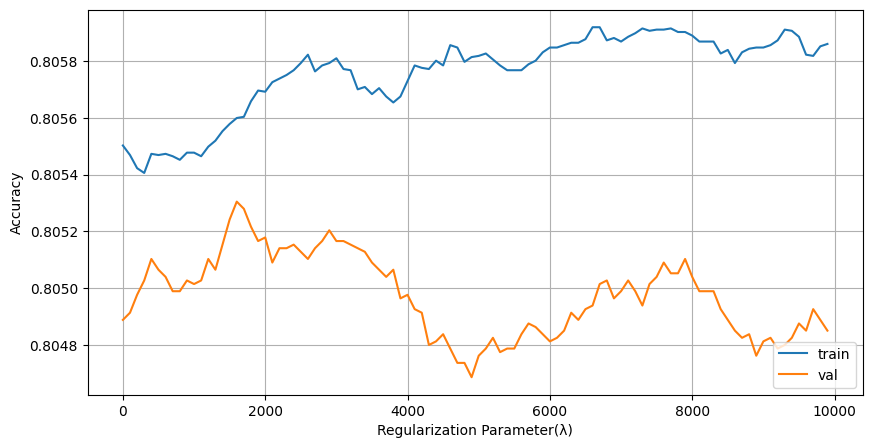

In [371]:
plt.figure(figsize=(10,5))
plt.plot(list(np.arange(0.01, 10000.00, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 10000.00, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [372]:
df['loan_status'].value_counts()

,count
loan_status,
1,318357
0,77673


From above we can see there is a data imbalance. We need to balance the data. We will us SMOTE implementation to add synthetic values into the dataset such that a balance can be achieved.

In [373]:
#SMOTE implementation

In [374]:
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

In [375]:
# Create an instance of SMOTE
sm = SMOTE()

In [376]:
# Convert y_train back to a pandas Series
y_train_series = pd.Series(y_train.flatten())

# Use value_counts() on the Series
y_train_series.value_counts()

,count
1,191163
0,46455


In [377]:
X_sm, y_sm = sm.fit_resample(X_train, y_train)#creating the synthetics

In [378]:
y_sm.shape

(382326,)

In [379]:
# Convert y_sm back to a pandas Series and then use value_counts()
display(pd.Series(y_sm).value_counts())

,count
1,191163
0,191163


Using SMOTE, we have a balance data set.  

In [380]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the Logistic Regression model with the balanced data
model_smote = LogisticRegression()
model_smote.fit(X_sm, y_sm)

# Evaluate the model on the test set
y_pred_test_smote = model_smote.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report on Test Set (after SMOTE):")
print(classification_report(y_test, y_pred_test_smote))

print("Confusion Matrix on Test Set (after SMOTE):")
print(confusion_matrix(y_test, y_pred_test_smote))

Classification Report on Test Set (after SMOTE):
              precision    recall  f1-score   support

           0       0.32      0.63      0.42     15650
           1       0.88      0.67      0.76     63556

    accuracy                           0.66     79206
   macro avg       0.60      0.65      0.59     79206
weighted avg       0.77      0.66      0.69     79206

Confusion Matrix on Test Set (after SMOTE):
[[ 9839  5811]
 [21202 42354]]


From the Confusion Matrix we can interpret

TN - 9856

FN - 21241

TP - 42315

FP - 5794


For Class 0  (Charged Off Customers)

precision = 0.32 , i.e 32% customers will default out of the predicted defaulters.

Recall = 0.63 , i.e 63% of all customers who truly defaulted were correctly identified by the model as defaulters.


For Class 1 (Fully Paid Customers)

precision = 0.88 , i.e 88% of the customers that the model predicted as repaid actually repaid.

recall = 0.67 , i.e 67% of all customers who truly repaid were correctly identified by the model as repayers


The model predicts the repaying customers well compared to the defaulting customers.



In [381]:
print(model_smote.coef_)
print(model_smote.intercept_)

[[ 0.19974009 -0.09135052  0.04161353  0.20854265 -0.21987273 -0.04498184
   0.05549211 -0.10160175  0.01912803 -0.01438668  0.0863165   0.05168566
  -0.04186341  0.00144549 -0.49447605  0.06328867 -0.04431978  0.02714678]]
[0.17458705]


In [382]:
y_pred_test_smote

array([0, 0, 1, ..., 1, 1, 0])

In [383]:
# Create a DataFrame with feature names and coefficients
coefficients_df = pd.DataFrame({
    'Feature': cols,
    'Coefficient': model_smote.coef_[0]
})

# Sort the DataFrame in ascending order by Coefficient
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

# Display the DataFrame
display(coefficients_df)

,Feature,Coefficient
3,annual_inc,0.21
0,term,0.20
10,mort_acc,0.09
15,home_ownership_encoded,0.06
6,revol_bal,0.06
11,pub_rec_bankruptcies,0.05
2,emp_length,0.04
17,purpose_encoded,0.03
8,total_acc,0.02
13,mort_acc_flag,0.00


The five most important features are

1. Annual income

2. Term

3. Mort_acc

4. Home ownership

5. Revolving Balance

In [384]:
model_smote.score(X_val, y_val)

0.6596848723581547

The Accurace of the model validation set is 0.65. 65% of the time the model predicts the correctly whether a customer will repay the loan or default on the loan.

In [385]:
model_smote.score(X_test, y_test)

0.6589526046006615

The model test scores are also giving same value as validation score of 0.65.

In [386]:
#Hyperparameter tuning
train_scores1 = []
val_scores1 = []

for lam1 in np.arange(0.01, 5000.0, 100): # range of values of Lambda
    model_smote = make_pipeline(StandardScaler(), LogisticRegression(C=1/lam1, max_iter=1000))
    model_smote.fit(X_train, y_train.flatten())

    train_score = model_smote.score(X_train, y_train.flatten())
    val_score = model_smote.score(X_val, y_val.flatten())

    train_scores1.append(train_score)
    val_scores1.append(val_score)

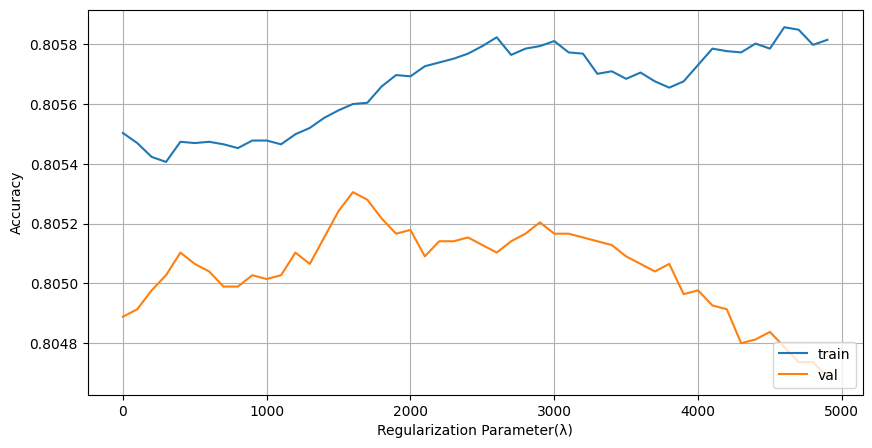

In [387]:
plt.figure(figsize=(10,5))
plt.plot(list(np.arange(0.01, 5000.00, 100)), train_scores1, label="train")
plt.plot(list(np.arange(0.01, 5000.00, 100)), val_scores1, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

The chart above illustrates the accuracy of the model for every regularization parameter value that was inputed in the model.It shows the maximum accuracy attainable is about 80.58%

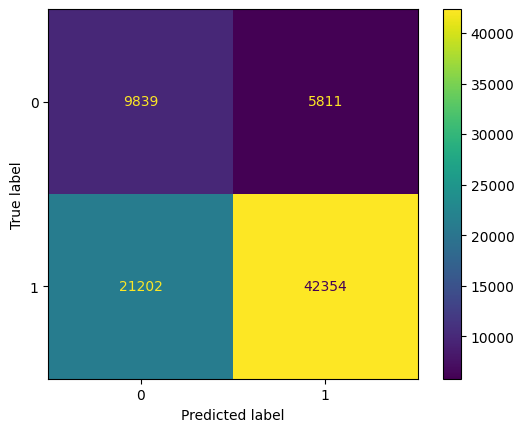

In [388]:
#confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test_smote)

ConfusionMatrixDisplay(cm).plot();

From the Confusion Matrix we can interpret

TN - 9856

FN - 21241

TP - 42315

FP - 5794


For Class 0  (Charged Off Customers)

precision = 0.32 , i.e 32% customers will default out of the predicted defaulters.

Recall = 0.63 , i.e 63% of all customers who truly defaulted were correctly identified by the model as defaulters.


For Class 1 (Fully Paid Customers)

precision = 0.88 , i.e 88% of the customers that the model predicted as repaid actually repaid.

recall = 0.67 , i.e 67% of all customers who truly repaid were correctly identified by the model as repayers


The model predicts the repaying customers well compared to the defaulting customers.



In [389]:
#precision , recall, f1score

from sklearn.metrics import precision_score, recall_score, f1_score

In [390]:
precision_score(y_test, y_pred_test_smote)

0.8793522267206477

In [391]:
recall_score(y_test, y_pred_test_smote)

0.6664044307382466

In [392]:
f1_score(y_test, y_pred_test_smote)

0.7582101842983862

In [393]:
#ROC and AU ROC Scores/Graph

from sklearn.metrics import roc_curve, roc_auc_score

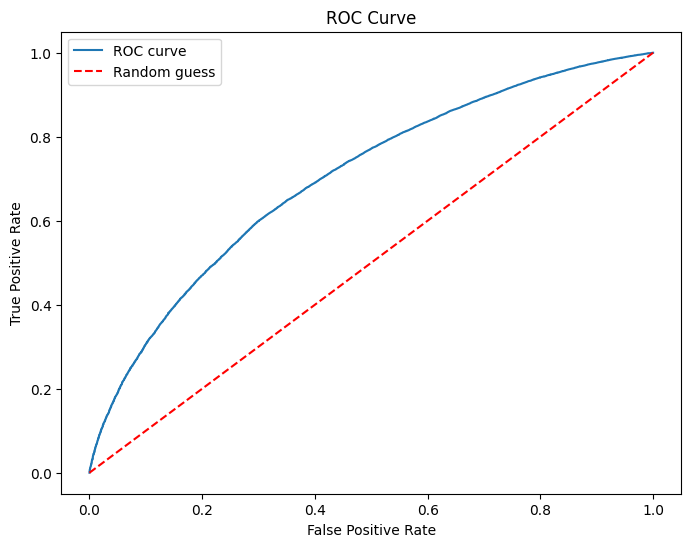

AUROC Score: 0.7024


In [394]:
# Get probabilities of the positive class
y_prob = model_smote.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'r--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate and print AUROC score
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUROC Score: {auc_score:.4f}")

The graph above illustrates the ROC curve and the AUROC score. While the AUROC score is good. The roc curve does not go along the left top of the chart, that is generally considered good.

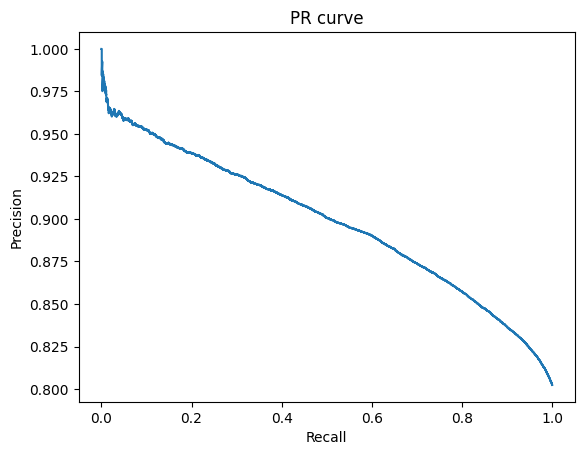

In [395]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

<Axes: xlabel='grade', ylabel='loan_amnt'>

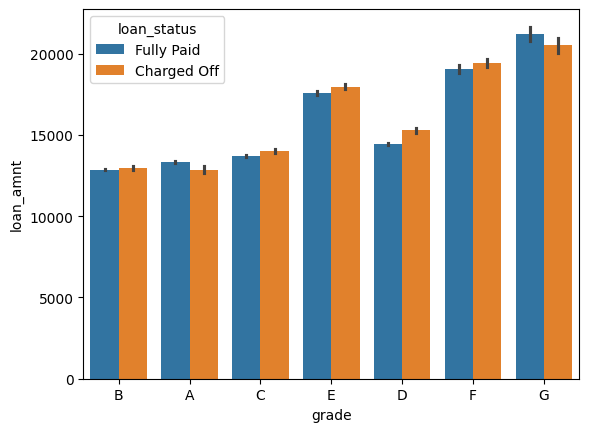

In [396]:
sns.barplot(x = df_orginal['grade'],hue=df_orginal['loan_status'],y=df_orginal['loan_amnt'], data=df_orginal)

In [397]:
df_orginal['emp_title'].nunique()

173106

## Results Interpretation and Stakeholder Presentation

##Questionnaire
(Answers should present in the text editor along with insights):
What percentage of customers have fully paid their Loan Amount?


Ans : About 80.4% of customers have fully paid their loans. This means the data is imbalanced.

Comment about the correlation between Loan Amount and Installment features.


Ans: The correlation between loan amount and installment feature is 0.95, which is very high in correlation. In such cases as we check for multicollinearity, one of the columns got dropped to avoid the same.  


The majority of people have home ownership as _______.


Ans : Majority of customers have their home ownership in mortgage, meaning they are still paying off the housing loan.


People with grades ‘A’ are more likely to fully pay their loan. (T/F)


Ans : False.

Name the top 2 afforded job titles.


Ans : Teacher and Managers


Thinking from a bank's perspective, which metric should our primary focus be
on..
ROC AUC
Precision
Recall
F1 Score



Ans : F1 Score


How does the gap in precision and recall affect the bank?


The model is good at predicting - the customers that will pay back the loan,i.e high precision and recall scores. The model missed more customers than failing to catch the defaulter. Though the numbers suggest that overall the model does not catch the customers that don't pay the loans.


Which were the features that heavily affected the outcome?


Ans: Features that heavily affected the outcomes were annual income, term, mort_acc, home ownership and revolving balance.


Will the results be affected by geographical location? (Yes/No)


ANS : No


##Key Insights


Loan Terms: Majority of loans are for 36 months (77%), with only 23% for 60 months. Longer terms are typically associated with larger loan amounts and higher installments.


Loan Grades & Subgrades: Most loans are issued in Grades B (29%) and C (27%), while Grade G loans are rare (<1%). This suggests risk is skewed toward mid-quality borrowers.


Employment & Home Ownership: Most customers are teachers/managers (~20%), with home ownership showing that 50% have mortgages, 40% rent, and only 10% fully own homes.


Loan Purpose: The dominant reasons for loans are debt consolidation (60%) and credit card repayment (21%), showing loans are largely used to restructure existing debts.


Loan & Installments: Loan amounts are typically 5k–20k with clusters at common slabs (10k, 15k, 20k). Installments cluster around ₹200–600, directly proportional to loan amount.


Income & DTI: Annual income is mostly between 45k–100k (median ~60k), but heavily skewed with outliers. Debt-to-income ratios cluster between 15–25, though many outliers exist above the safe threshold of 40.


Credit History: Most customers have 10–16 open credit lines, with low recent inquiries and minimal delinquencies/public records — suggesting a fairly healthy borrower base.


Loan Status (Target Variable): Data is imbalanced — ~80% of loans are fully paid and ~20% charged off. SMOTE was used to balance classes before modeling.


Model Performance (after SMOTE): (Keeping Fully paid = 1, defaulter =0)


Accuracy (Validation): 65%


Class 0 (Defaults): Precision = 0.32, Recall = 0.63


Class 1 (Fully Paid): Precision = 0.88, Recall = 0.67


The model predicts repayers better than defaulters, meaning the bank still risks missing many defaulters (false negatives).


Feature Importance: Top drivers of repayment/default are Annual Income, Loan Term, Mortgage Accounts, Home Ownership, and Revolving Balance.


ROC–AUC: The AUROC score is reasonable, but the ROC curve doesn’t hug the top-left corner, indicating room for improvement in separating repayers vs defaulters

##Recommendations:


Strengthen Credit Policies: Customers with weaker grades should undergo stricter verification before loan approval.


Prioritize Low-Risk Segments: Customers with higher credit grades (e.g., A or B) can be targeted with faster approvals and competitive interest rates.


Balance Risk & Growth: Avoid being overly conservative—rejecting too many applicants could mean lost interest income from good borrowers.


Focus on Early Warning Signs: Closely monitor repayment behavior in the first few months to proactively address potential defaults.


Refine Customer Segmentation: Design tailored loan products (amount, tenure, rate) based on income levels and job profiles to improve repayment rates.

## Tradeoff Questions:

How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it. (10 Points)

ans:

To balance finding real defaulters while we minimize false positives we must :

Balanced Data - Using SMOTE we can make sure the model learns both defaulters and non defaulters.

Threshold Tuning - Instead of using default 0.5 probability cutoff, we can manipulate it based on banks priority.

Try multiple models .

Select model that maximizes F1 Score.

Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone. (10 Points)
Ans : It is not possible to stop disbursing loans as it is part of the company's revenue model . Thus we need to minimize NPA while maximizing profitable loans.

ans:

Company must accept some risk

Using data, approve low risk customers and reject high risk customers.

Monitor the model regularly to reduce NPA’s.


In [404]:
from google.colab import files
uploaded = files.upload()

Saving BusinessCase_LoanTapRegression.ipynb to BusinessCase_LoanTapRegression.ipynb


In [405]:
!jupyter nbconvert --to html BusinessCase_LoanTapRegression.ipynb

[NbConvertApp] Converting notebook BusinessCase_LoanTapRegression.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 34 image(s).
[NbConvertApp] Writing 2265569 bytes to BusinessCase_LoanTapRegression.html


In [407]:
files.download('BusinessCase_LoanTapRegression.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>